# THE PROBLEM STATEMENT AND BUSINESS CASE

You have been hired as a consultant to a bank in New York City. 

The bank has extensive data on their customers for the past 6 months. 

The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.  

CUSTID: Identification of Credit Card holder 

 BALANCE: Balance amount left in customer's account to make purchases

 BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

 PURCHASES: Amount of purchases made from account

 ONEOFFPURCHASES: Maximum purchase amount done in one-go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

 PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

 CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid

 CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

 PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user

 PAYMENTS: Amount of Payment done by user

 MINIMUM_PAYMENTS: Minimum amount of payments made by user  

 PRC_FULL_PAYMENT: Percent of full payment paid by user

 TENURE: Tenure of credit card service for user



Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata



# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
# Read the data
creditcard_df = pd.read_csv('Marketing_data.csv')

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


1. Mean balance is 1564 dollars
2. Balance frequency is frequently updated on average ~0.9
3. Purchases average is 1000 dollars
4. one off purchase average is ~600 dollars
5. Average purchases frequency is around 0.5
6. average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
7. Average credit limit ~ 4500
8. Percent of full payment is 15%
9. Average tenure is 11 years

In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!


creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


1. This customer made 123 cash advance transactions!!
2. Never paid credit card in full

# VISUALIZE AND EXPLORE DATASET

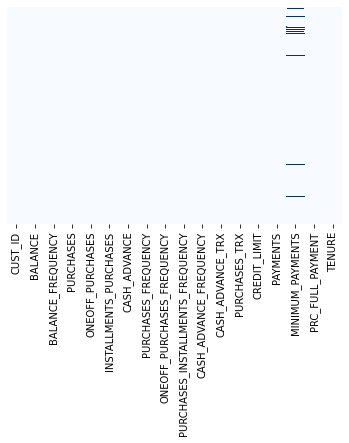

In [ ]:
# Let's see if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

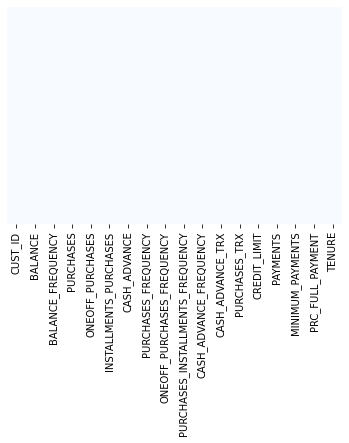

In [ ]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

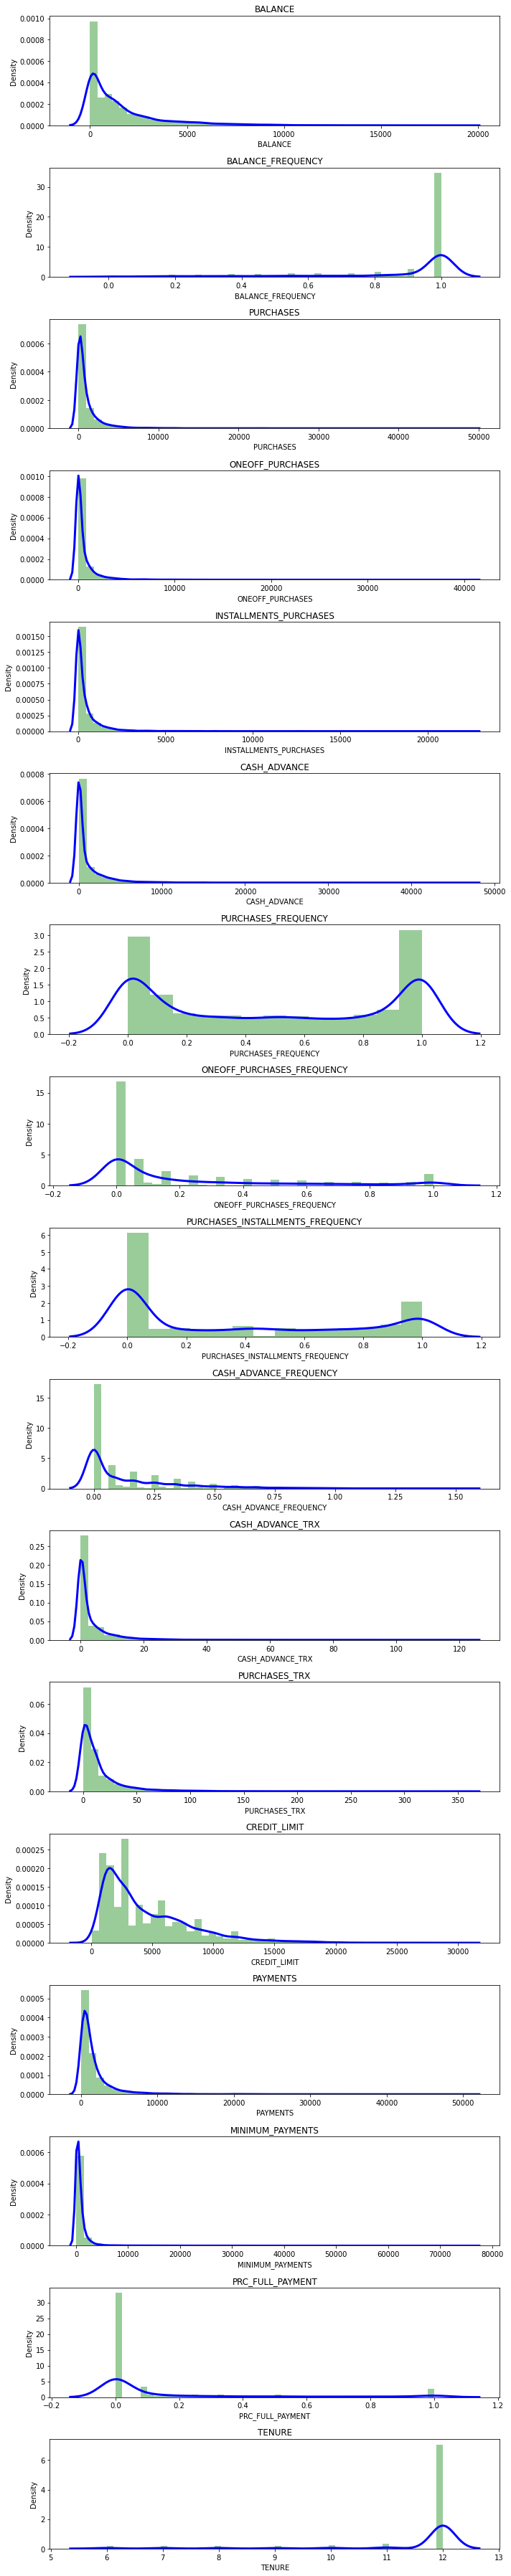

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()




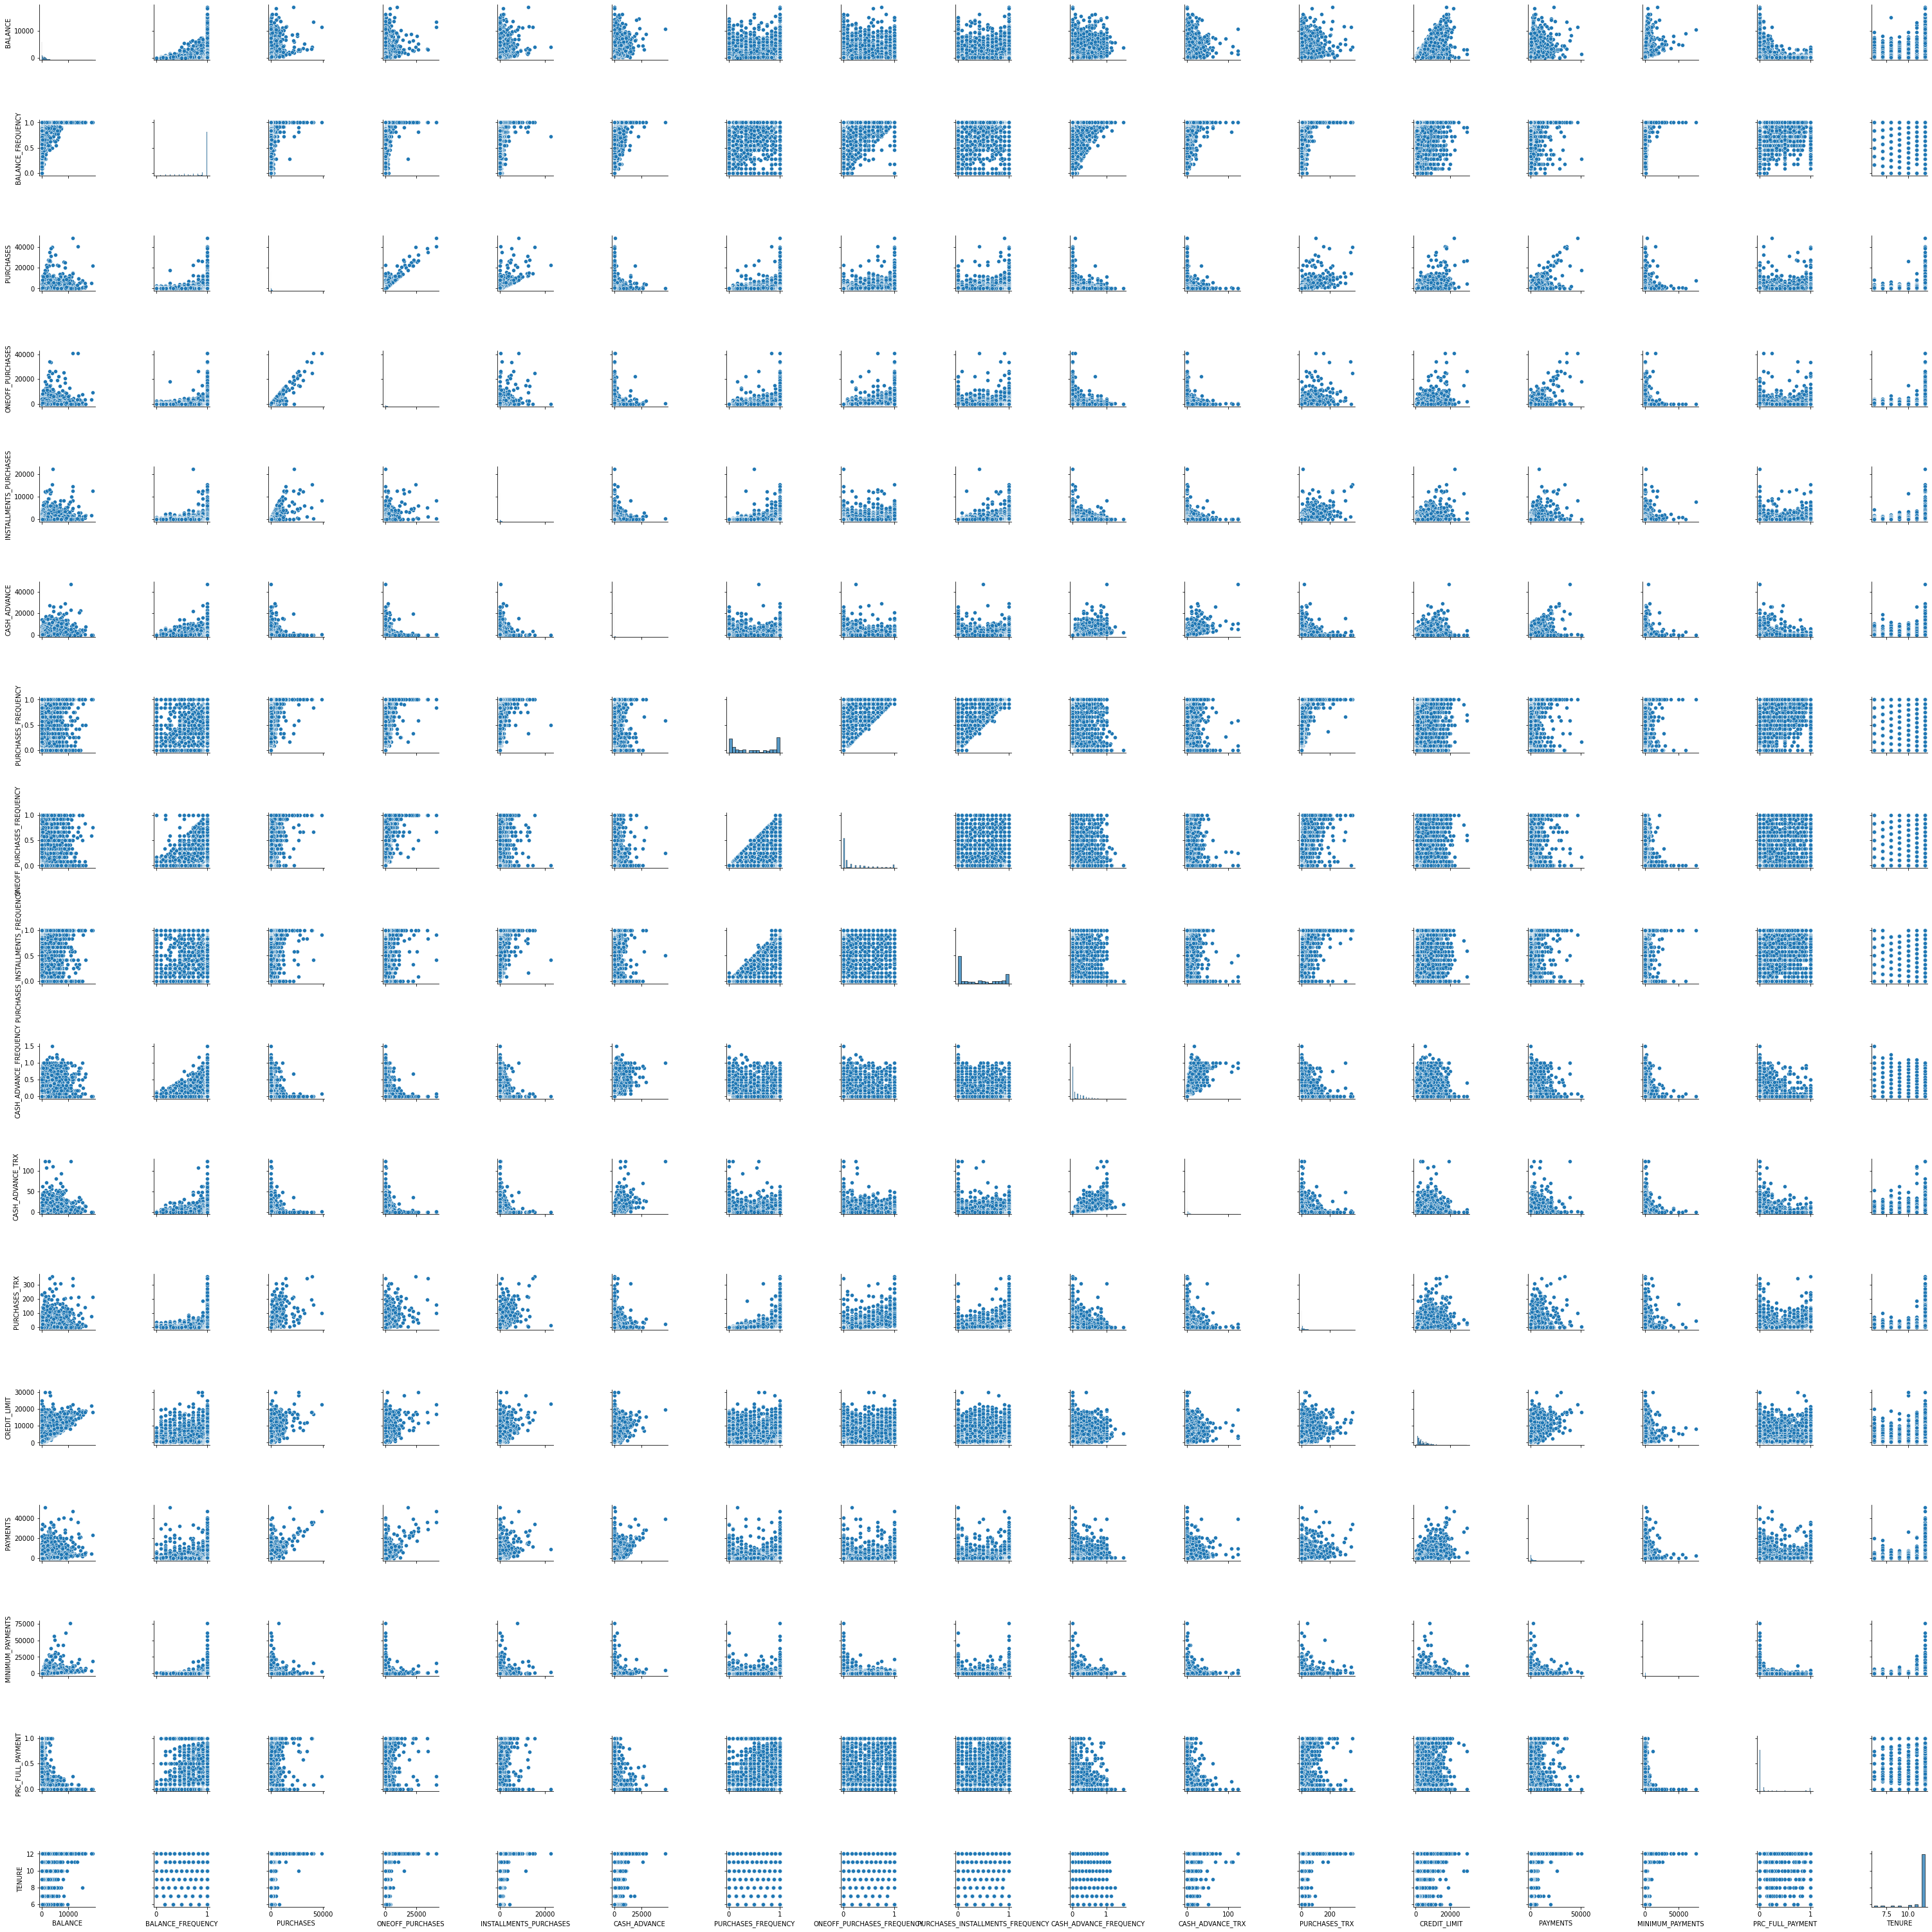

In [ ]:
sns.pairplot(creditcard_df)



Correlation:
*************
1. Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
2. Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

In [ ]:
correlations = creditcard_df.corr()

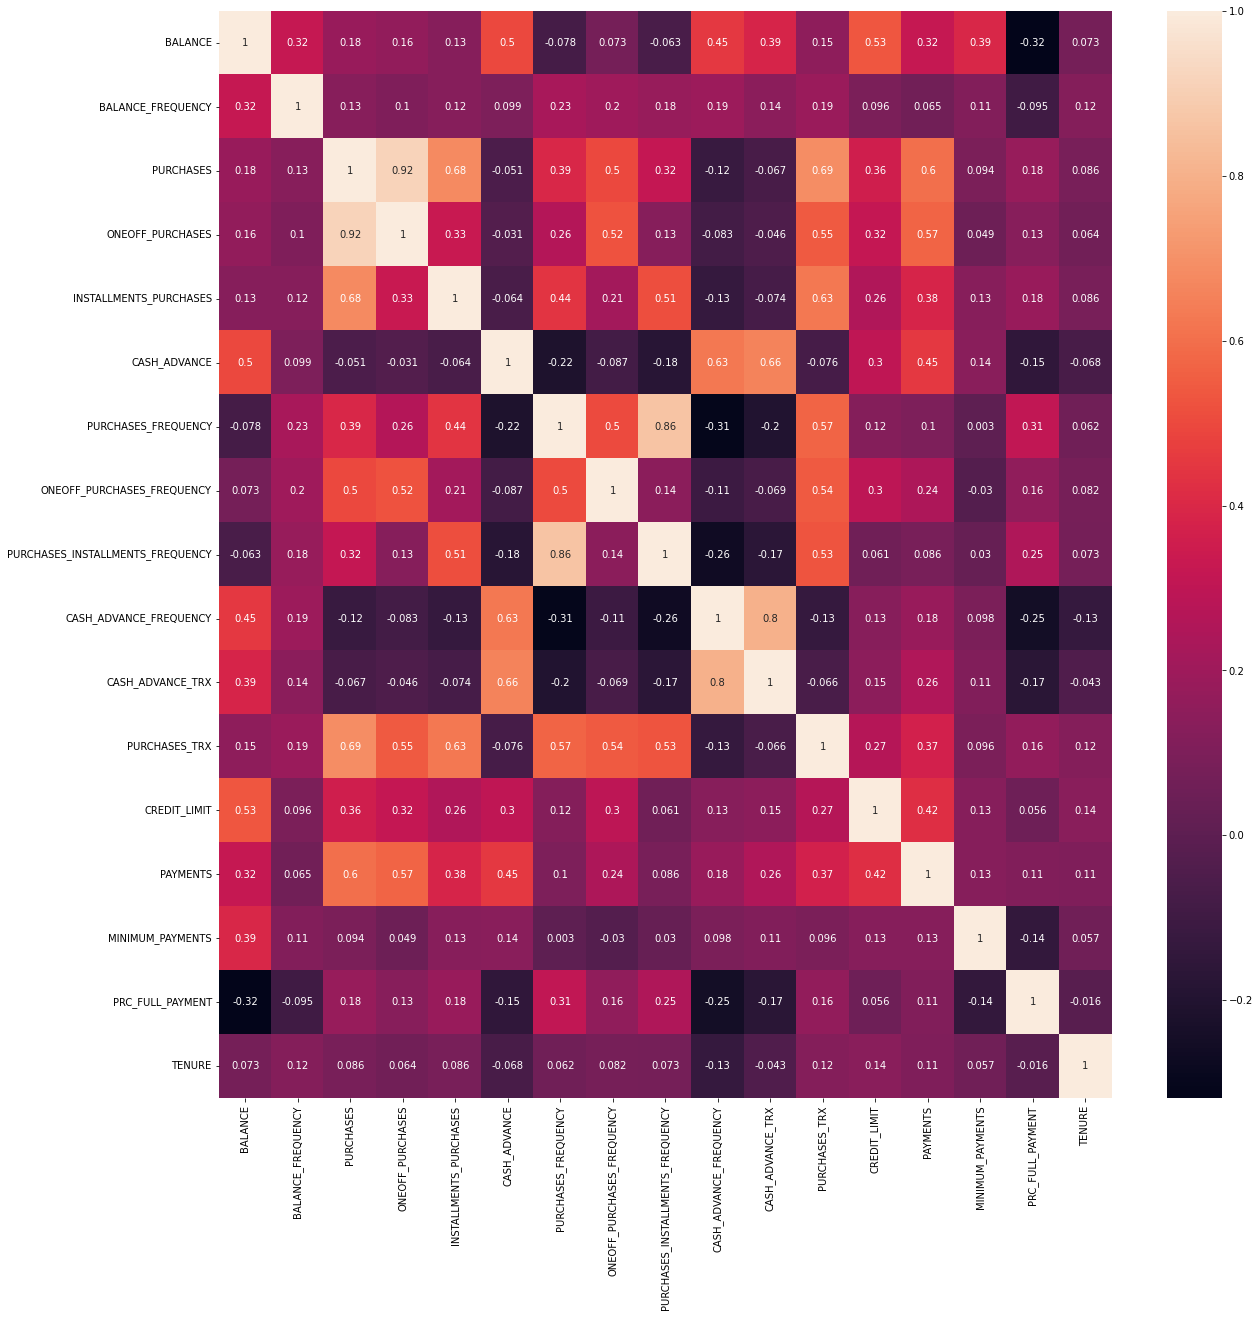

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)


1. 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
2.  Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
#Apply Kmeans 20 times and find the WCSS (Within CLuster Sum of Squared Distance - distance between each data point and hte centroid)
scores_1 = []

# values of k till 20
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  # the WCSS value is the inertia_ parameter
  scores_1.append(kmeans.inertia_) 



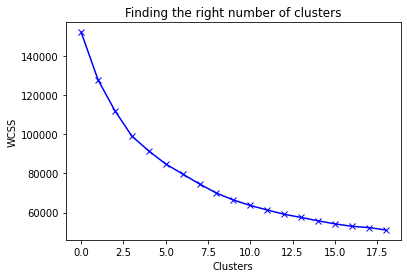

In [ ]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()


1. From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
2. However, the values does not reduce linearly until 8th cluster. 
3. Let's choose the number of clusters to be 8.

# APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([1, 4, 6, ..., 0, 1, 1], dtype=int32)

In [ ]:
labels.max()

7

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
         
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers    

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.397428,0.307985,-0.064261,-0.257297,0.320712,-0.361748,0.976642,-0.414514,1.170834,-0.461037,-0.356988,0.133593,-0.321441,-0.245780,-0.108756,0.356465,-0.021044
1,-0.010913,0.367883,-0.362599,-0.245471,-0.406303,-0.074717,-0.873357,-0.402830,-0.771443,0.147315,-0.019738,-0.490796,-0.339342,-0.266673,-0.057195,-0.454574,-0.015895
2,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
3,0.996418,0.465050,2.431213,1.814801,2.414517,-0.156803,1.163768,1.581085,1.264485,-0.280020,-0.153846,3.032971,1.265049,1.421557,0.358364,0.268740,0.338877
4,1.577545,0.373494,-0.227267,-0.159623,-0.244182,1.956275,-0.477903,-0.203360,-0.428571,1.923435,1.863848,-0.277105,0.962379,0.748051,0.355931,-0.390475,-0.091306
5,-0.698370,-2.140237,-0.317984,-0.236787,-0.316746,-0.306984,-0.566322,-0.436184,-0.460052,-0.487726,-0.362135,-0.428220,-0.215084,-0.221992,-0.255336,0.253131,-0.153700
6,-0.136999,0.392192,0.498695,0.621333,0.037517,-0.329749,0.951308,1.829779,0.164931,-0.409426,-0.331364,0.576386,0.411317,0.113632,-0.157928,0.400739,0.191446
7,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,737.261306,0.950229,865.910374,165.377651,701.083383,220.268763,0.882324,0.078800,0.829757,0.042886,0.812644,18.030457,3324.913883,1021.634827,610.755447,0.257975,11.489156
1,1541.759315,0.964419,228.506229,185.006538,43.652967,822.185049,0.139830,0.082286,0.057846,0.164623,3.114129,2.510485,3259.785722,961.152092,730.915352,0.020760,11.496047
2,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
3,3638.434536,0.987437,6197.528886,3604.634960,2594.485438,650.047094,0.957427,0.674126,0.866976,0.079109,2.198939,90.098143,9097.214854,5848.412130,1699.359501,0.232316,11.970822
4,4848.000731,0.965748,517.644703,327.495763,190.256642,5081.270839,0.298545,0.141791,0.194112,0.520043,15.968220,7.822034,7995.979391,3898.676831,1693.688852,0.039507,11.395127
5,110.875748,0.370268,323.827078,199.419085,124.638070,335.111619,0.263058,0.072336,0.181601,0.037545,0.777519,4.065891,3711.886739,1090.500088,269.157115,0.227751,11.311628
6,1279.323826,0.970177,2068.674929,1623.722065,444.993664,287.371471,0.872156,0.748316,0.429985,0.053214,0.987510,29.036636,5990.990084,2062.098790,496.161752,0.270924,11.773522
7,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,0.000000,11.918919


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()


7

In [ ]:
labels.min()

0

Add a column in the 

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


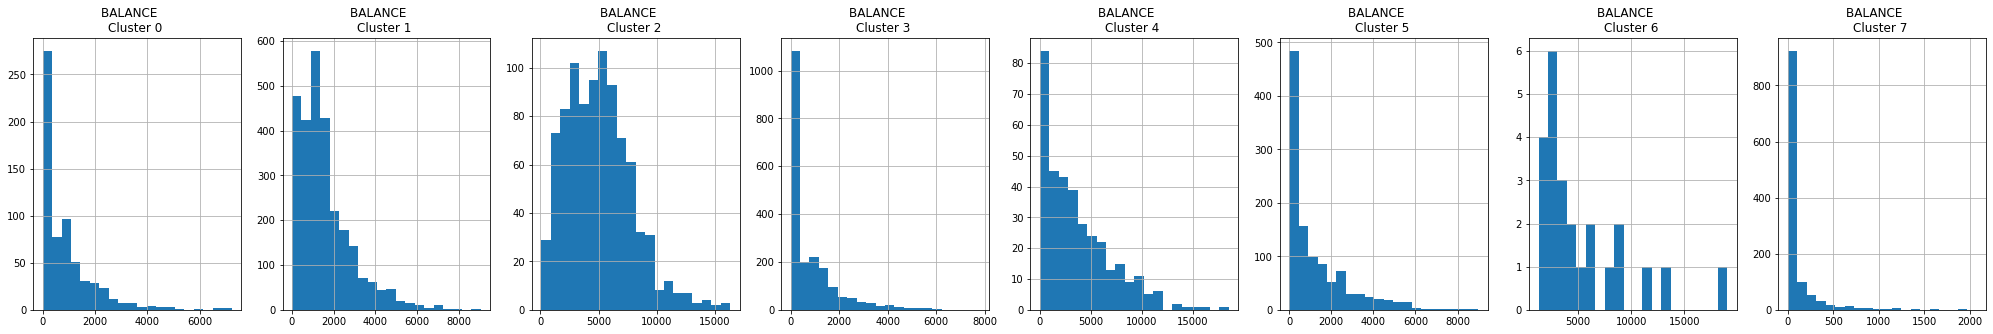

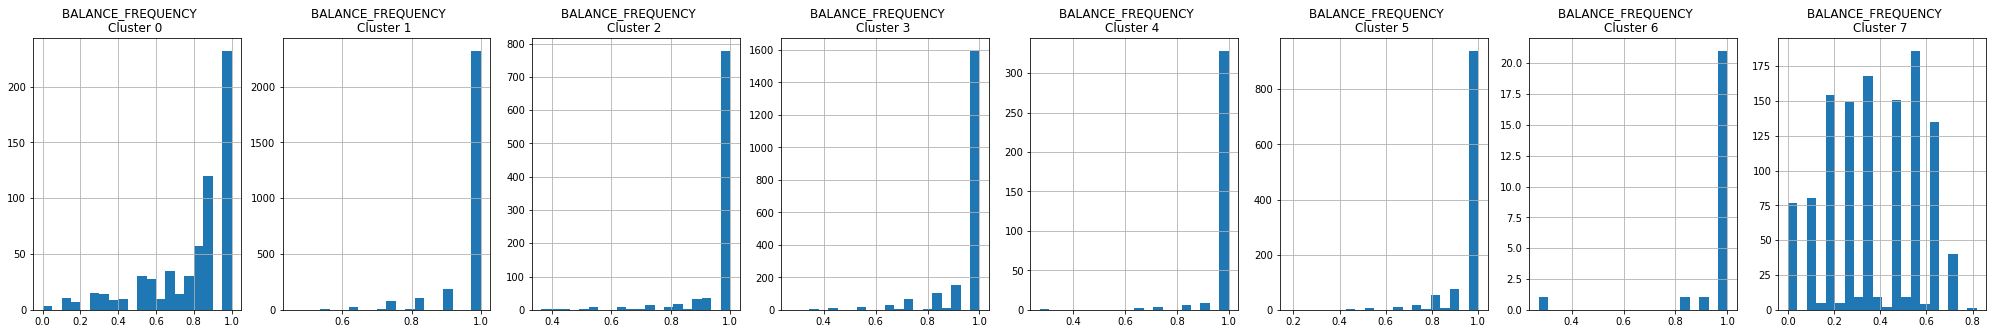

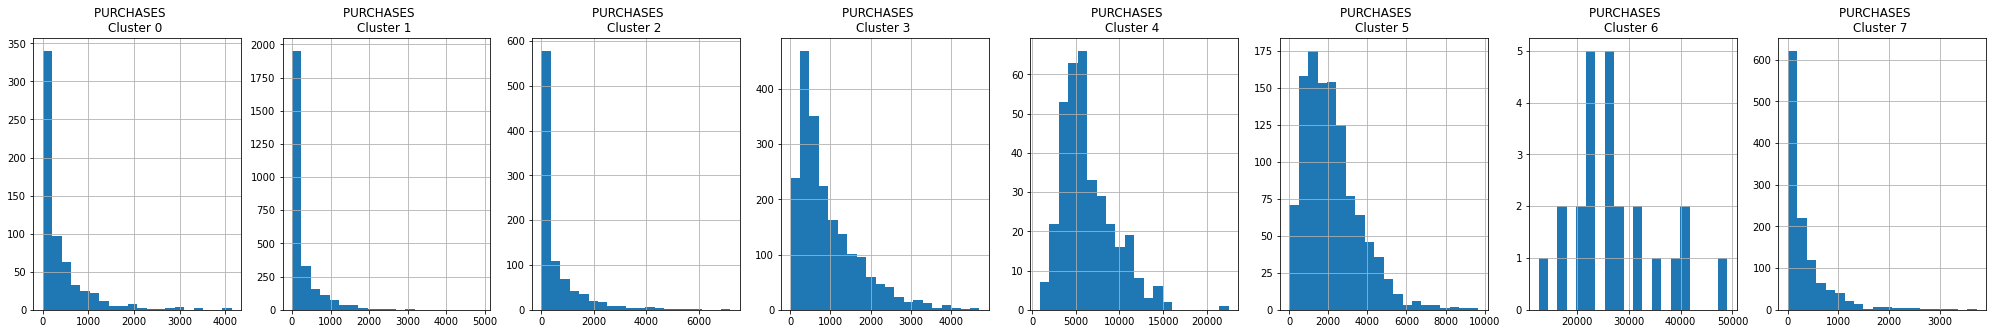

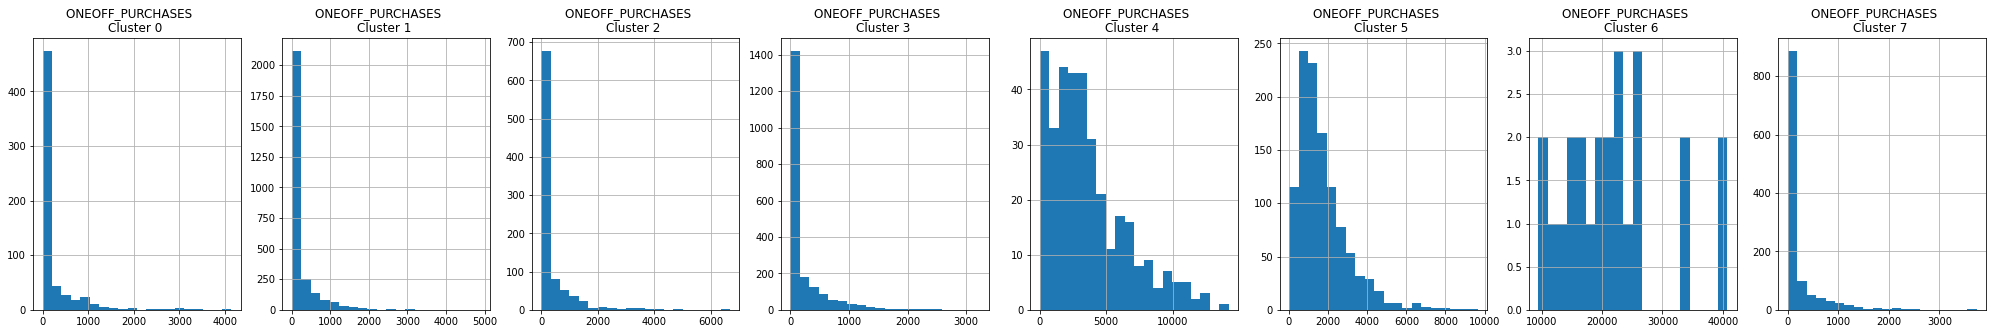

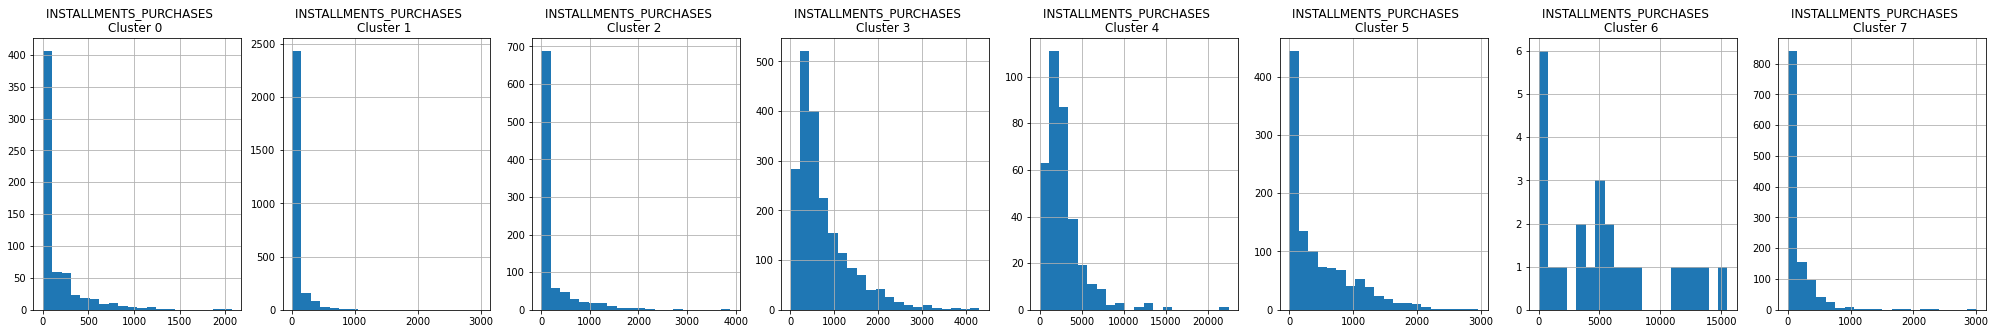

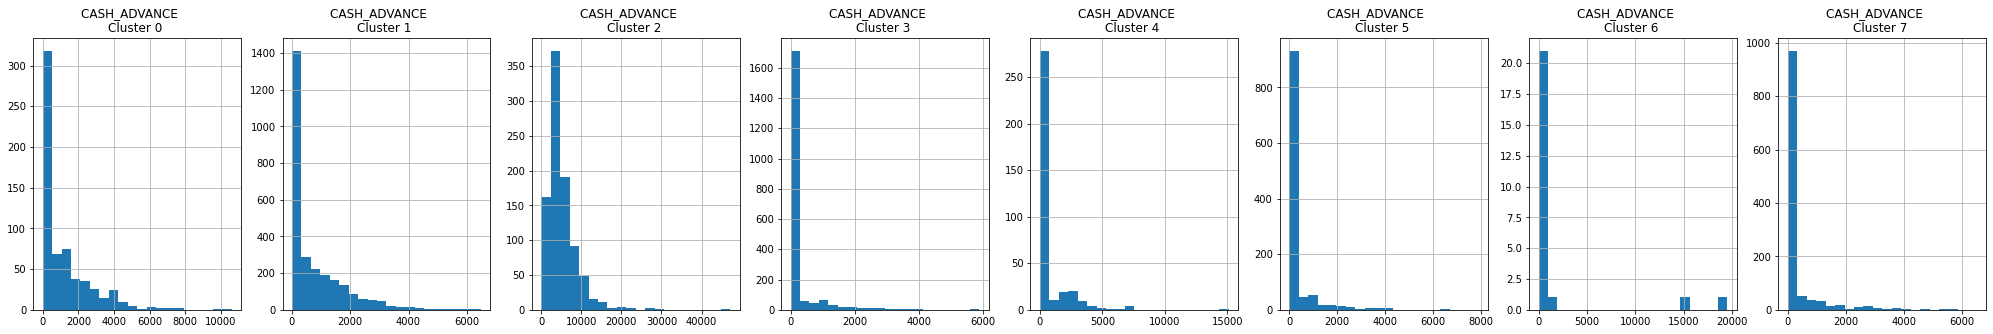

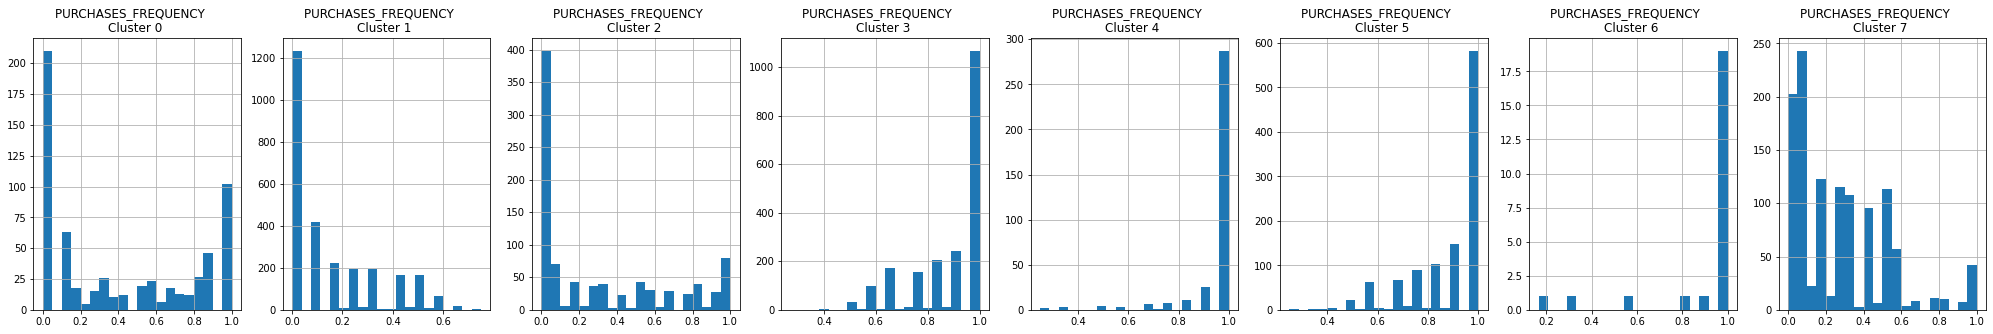

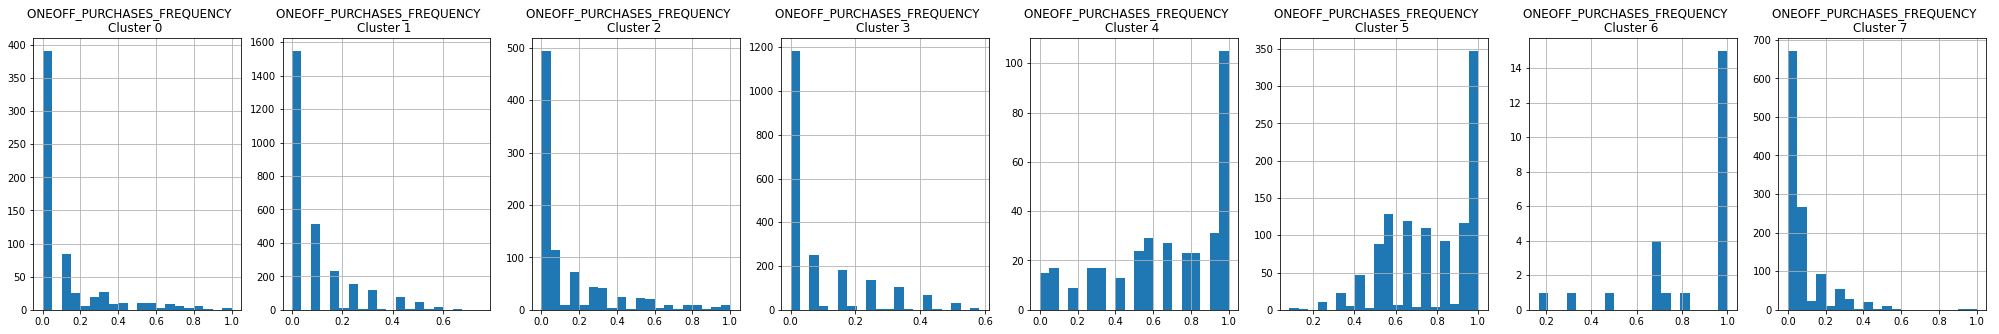

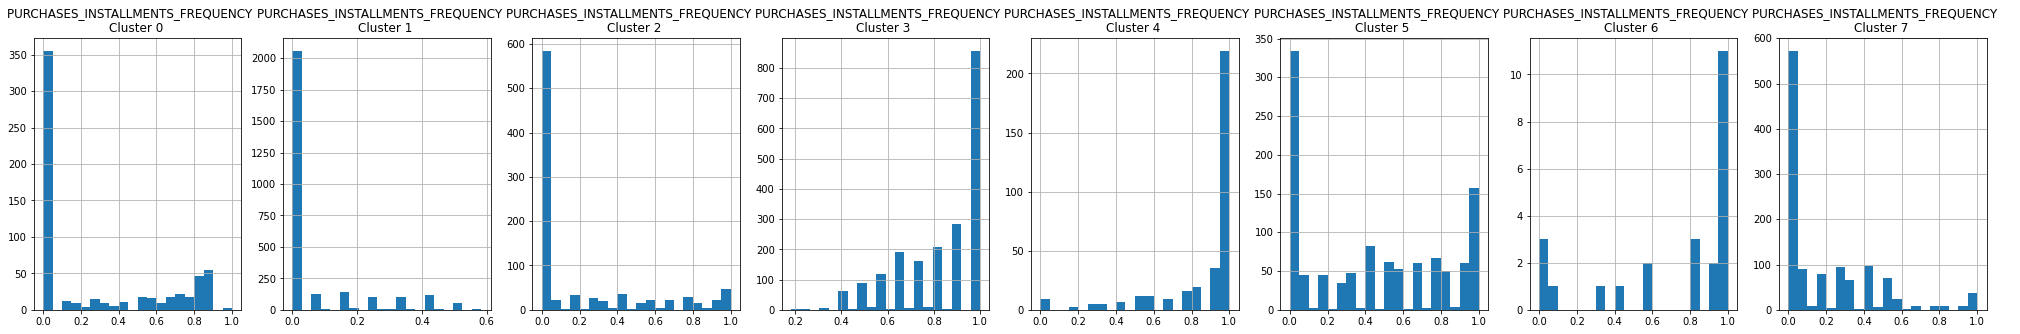

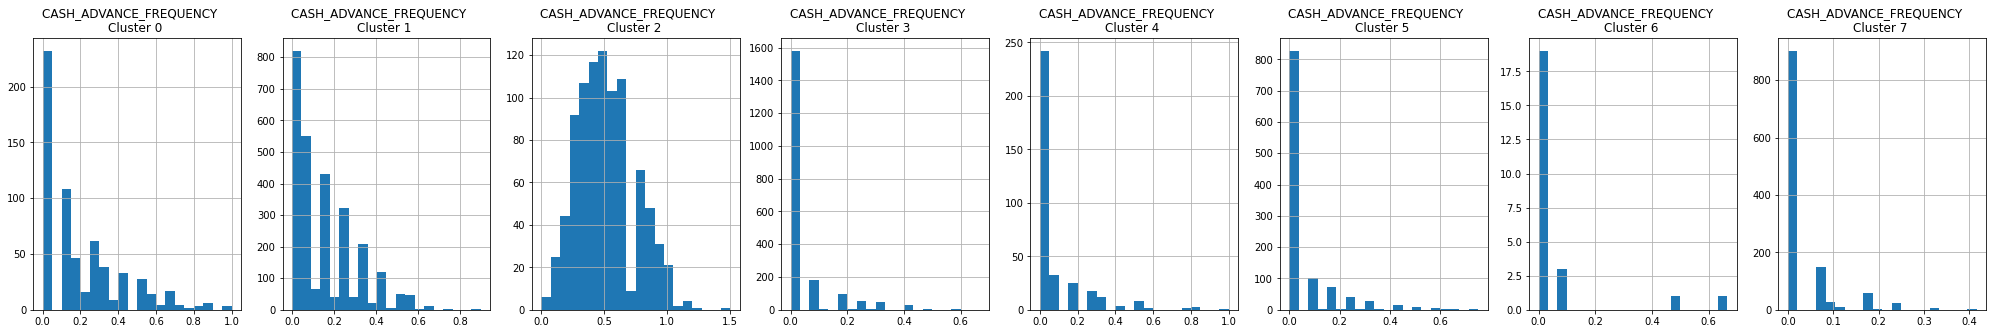

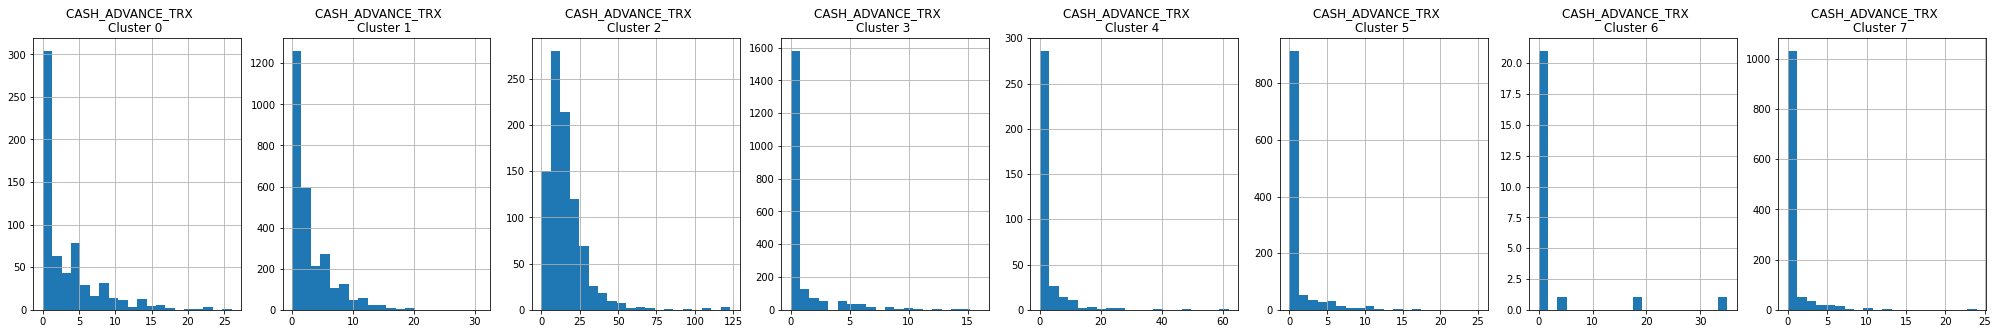

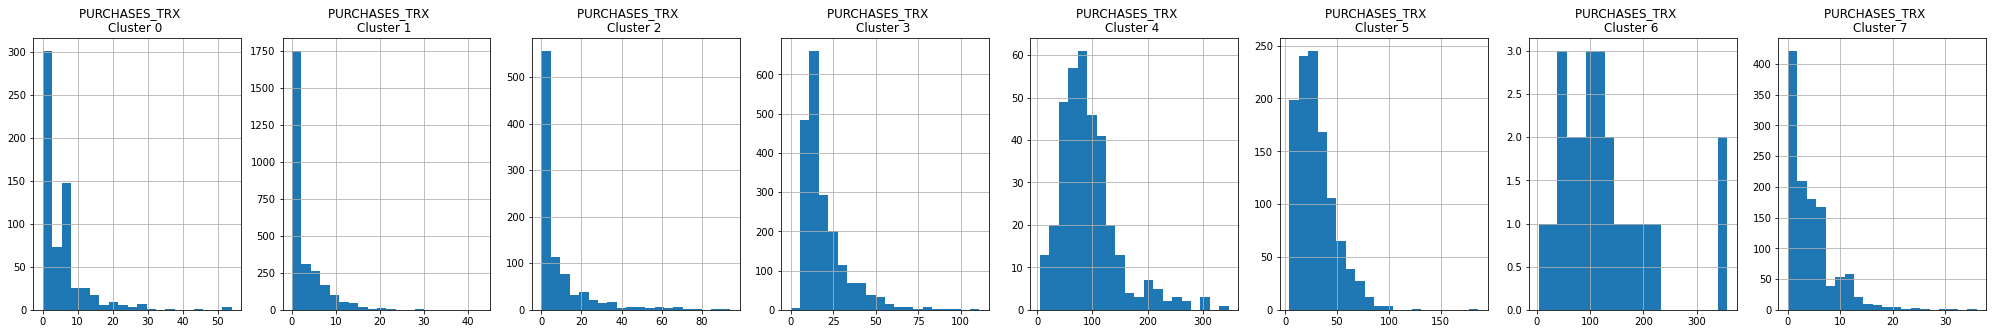

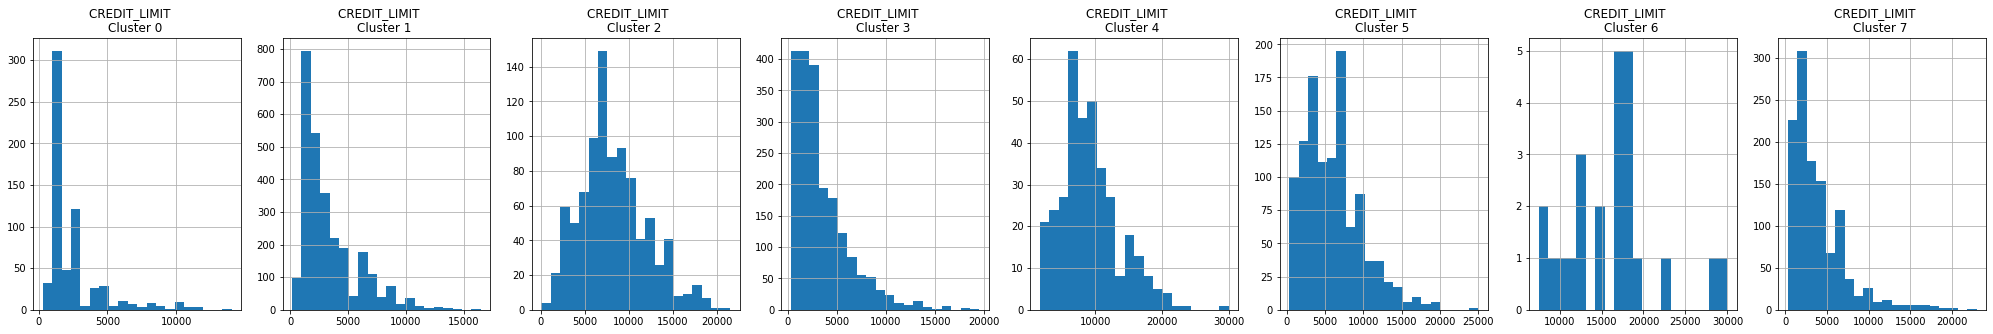

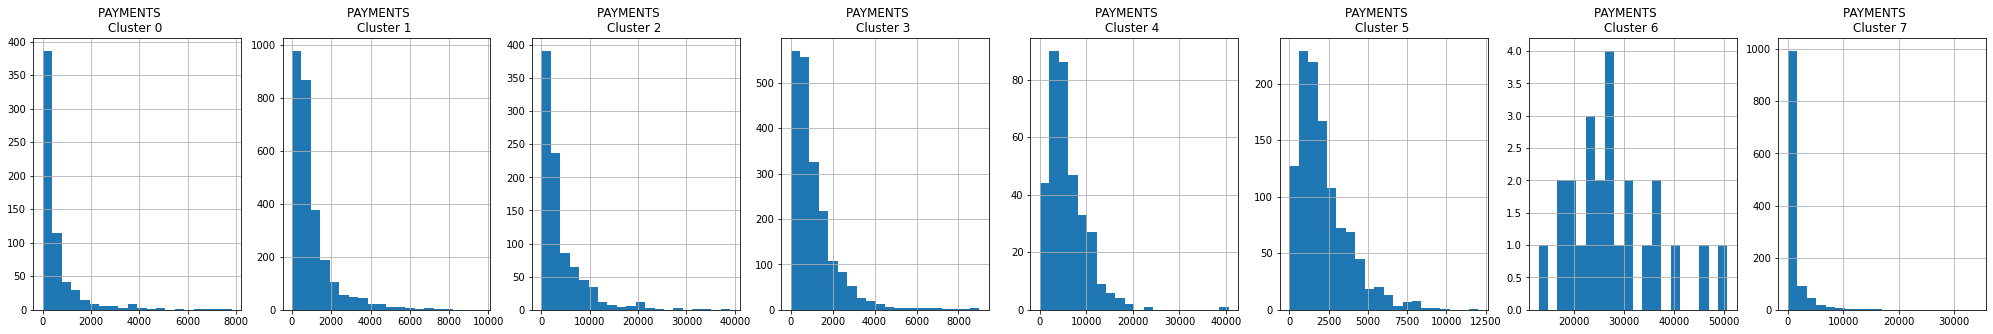

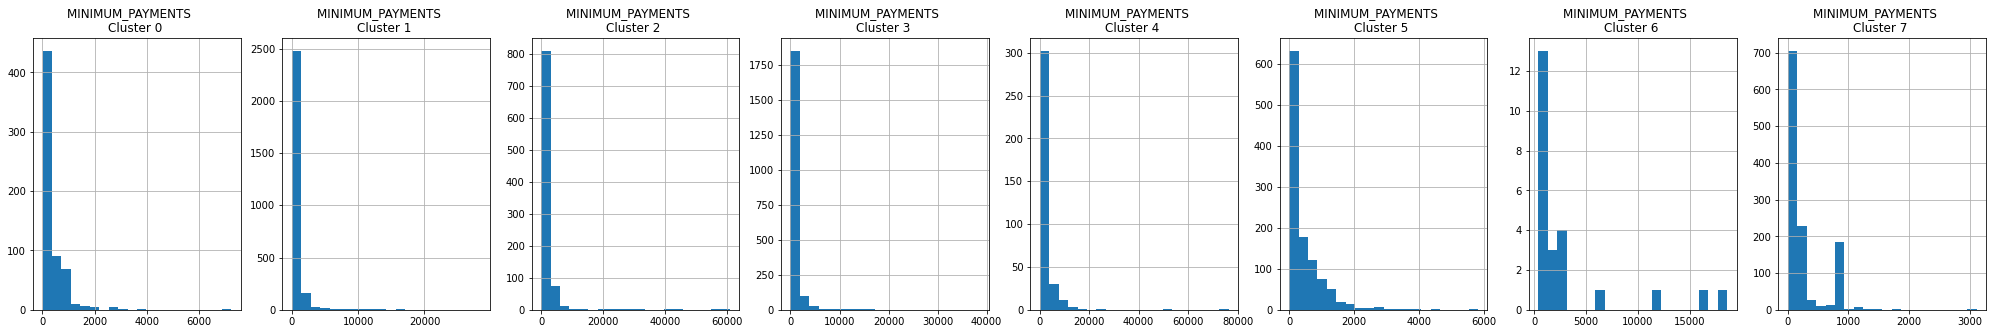

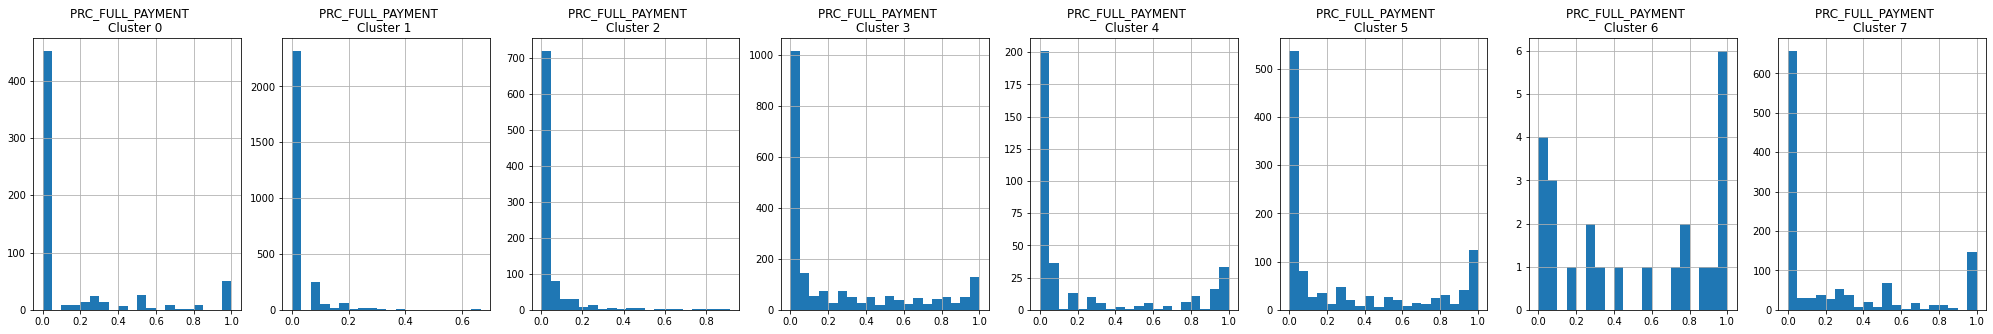

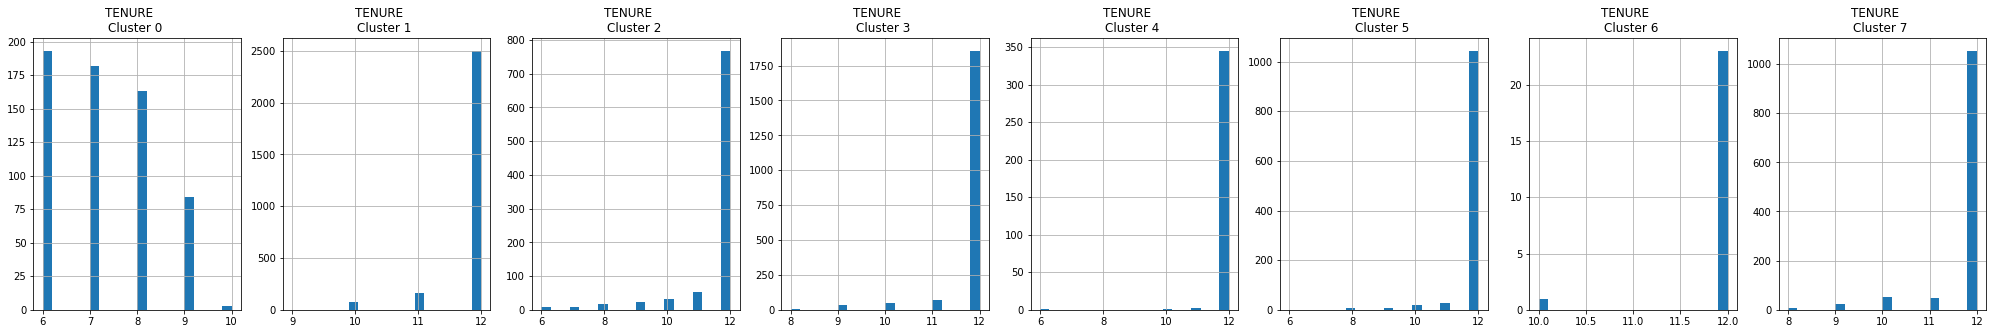

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222131, -1.07644754],
       [-1.13829821,  2.50648131],
       [ 0.96968664, -0.38353995],
       ...,
       [-0.9262034 , -1.81078408],
       [-2.3365518 , -0.65795711],
       [-0.55641981, -0.40047219]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076448
1,-1.138298,2.506481
2,0.969687,-0.383540
3,-0.873630,0.043174
4,-1.599434,-0.688580


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076448,1
1,-1.138298,2.506481,4
2,0.969687,-0.383540,6
3,-0.873630,0.043174,1
4,-1.599434,-0.688580,1


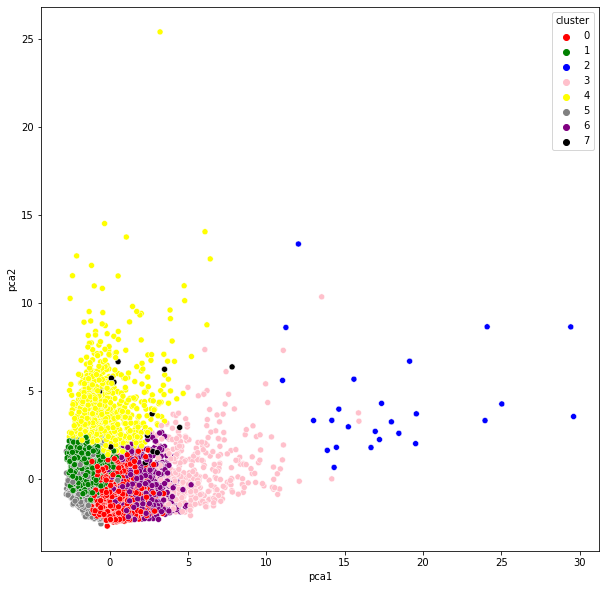

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
# Havier normal intializer. draw samples from truncated normal distribution
from keras.optimizers import SGD

In [ ]:
input_df = Input(shape=(17,))

In [ ]:
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation ='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#Autoencoder 
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs =25, verbose =1)

Epoch 1/25
70/70 [==============================] - 5s 58ms/step - loss: 0.5814
Epoch 2/25
70/70 [==============================] - 4s 58ms/step - loss: 0.3117
Epoch 3/25
70/70 [==============================] - 4s 62ms/step - loss: 0.2344
Epoch 4/25
70/70 [==============================] - 5s 63ms/step - loss: 0.1985
Epoch 5/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1719
Epoch 6/25
70/70 [==============================] - 5s 73ms/step - loss: 0.1670
Epoch 7/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1491
Epoch 8/25
70/70 [==============================] - 5s 66ms/step - loss: 0.1403
Epoch 9/25
70/70 [==============================] - 7s 97ms/step - loss: 0.1324
Epoch 10/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1210
Epoch 11/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1150
Epoch 12/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1089
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 126       
                                                                 
 dense_2 (Dense)             (None, 500)               4000      
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010     
                                                                 
 dense_6 (Dense)             (None, 2000)              22000 

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 6ms/step


In [ ]:
pred.shape

(8950, 10)

1. Features reduced from 17 to 10 here

Let's apply 
1. Find optimal number of clusters
2. Apply Kmeans
3. Apply PCA and visualize

on the pred - o/p of autoencoder

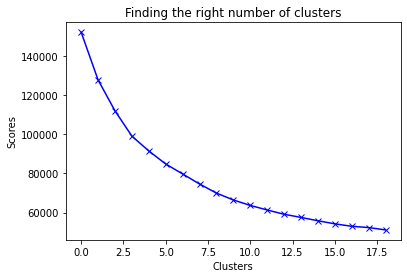

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

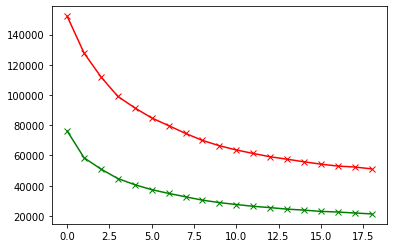

In [ ]:
plt.plot(scores_1, 'bx-', color ='r')
plt.plot(scores_2, 'bx-', color = 'g')

1. The elbow occurs at around 4-5, so select 4

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)

labels = kmeans.labels_

In [ ]:
df_cluster_dr =  pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components =2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.708318,-0.141098,0
1,1.023547,-1.566093,1
2,-0.553948,0.717785,0
3,-0.410369,-0.160482,0
4,-1.536810,-0.225752,0


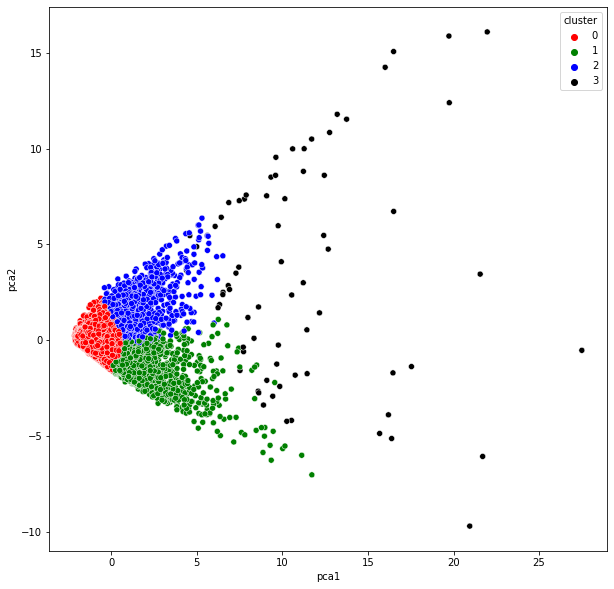

In [ ]:
plt.figure(figsize = (10,10))
ax =  sns.scatterplot(x = 'pca1', y= 'pca2', hue ='cluster', data= pca_df, palette =['red', 'green', 'blue', 'black'])

# Comparison of 2 Models

The evaluation metrics used here is the silhouette_score and  it is used to evaluate the quality of clusters created by the algorithm.Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

In [ ]:
print(silhouette_score(creditcard_df_scaled, kmeans.labels_, metric='euclidean'))

0.22083321479042697


In [ ]:
print(silhouette_score(pred, kmeans.labels_, metric='euclidean'))

0.35147762


It can be concluded that the method 2 has better Silhouette_score and hence the better method among the two.

# Cluster Analysis and Building Personas Using the selected models

Inorder to analyse the cluster let's find the mean of each class

In [ ]:
# The easiest way to summarize is by identifying the average of each column
avg_df_cluster_dr = df_cluster_dr.groupby(['cluster'], as_index=False).mean()
avg_df_cluster_dr

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,1128.122336,0.875656,538.594642,245.451839,293.459941,463.442626,0.469005,0.123946,0.373862,0.087512,1.661034,9.823298,3767.414216,999.403521,537.410556,0.104375,11.758326
1,1,3325.045213,0.852672,380.821328,254.059607,126.849993,3645.911055,0.210390,0.104185,0.118898,0.409389,11.644540,4.974304,5670.272897,2974.816782,1821.607497,0.071711,10.363312
2,2,1468.050328,0.904522,3027.399638,2031.418408,996.437091,431.448093,0.853243,0.633520,0.556287,0.066922,1.575977,41.707670,6129.906372,2989.195679,698.275526,0.448842,11.607091
3,3,6095.974592,0.969571,13590.999167,8929.552222,4661.446944,3222.652764,0.779335,0.486911,0.661995,0.140467,6.402778,99.597222,11768.750000,15576.198266,13083.921313,0.261329,11.847222


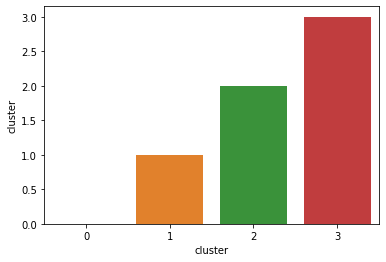

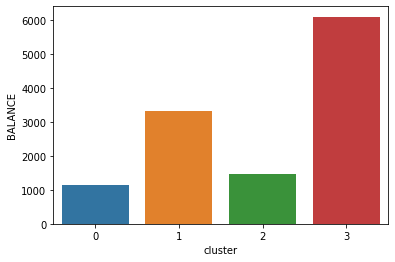

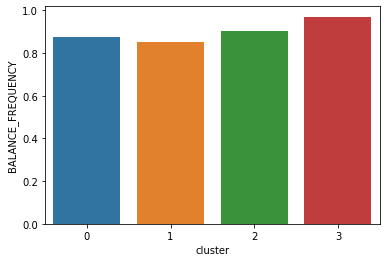

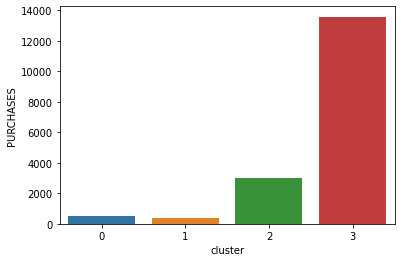

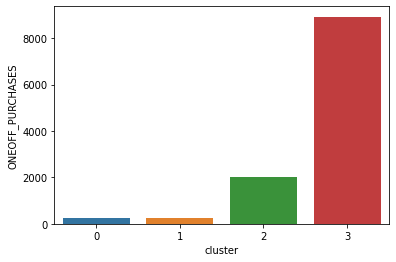

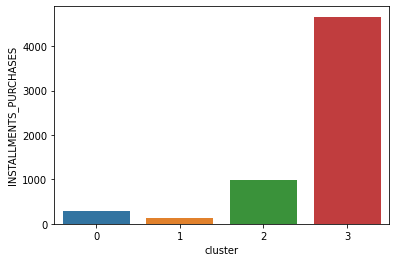

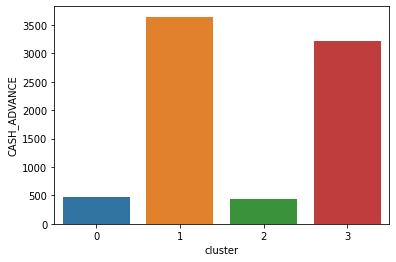

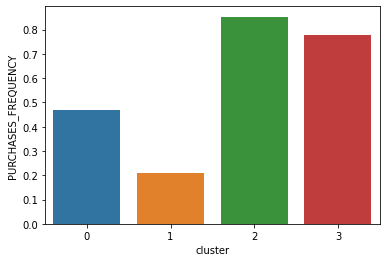

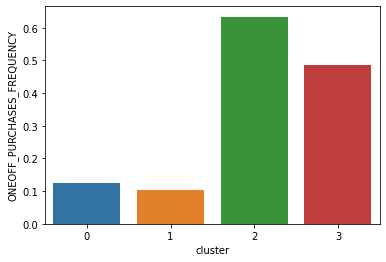

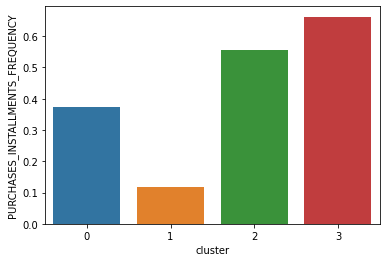

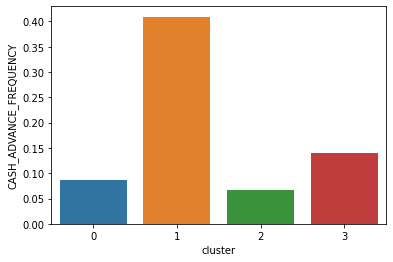

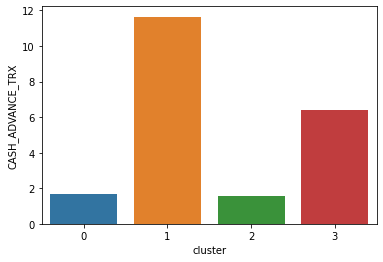

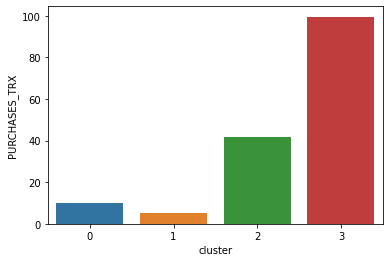

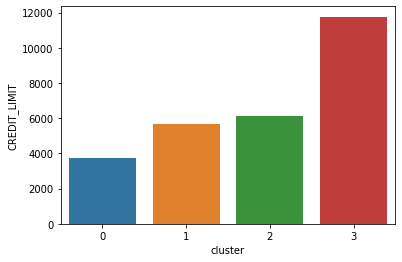

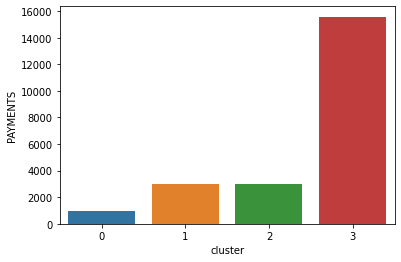

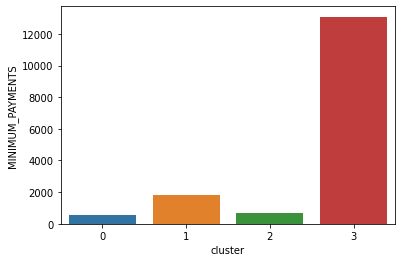

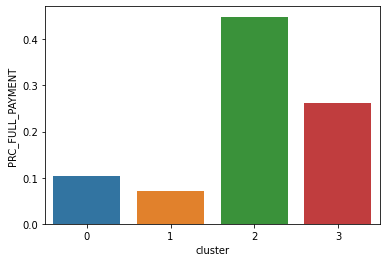

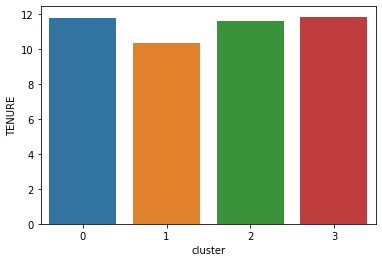

In [ ]:
for i in avg_df_cluster_dr.columns:
  sns.barplot(x='cluster', y= i, data=avg_df_cluster_dr)
  plt.show()


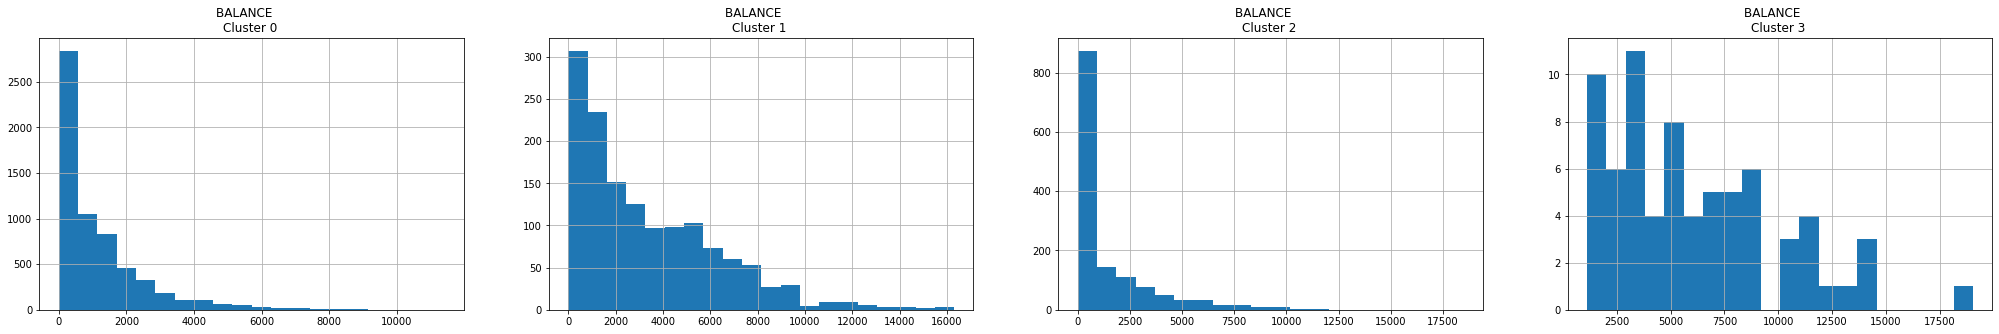

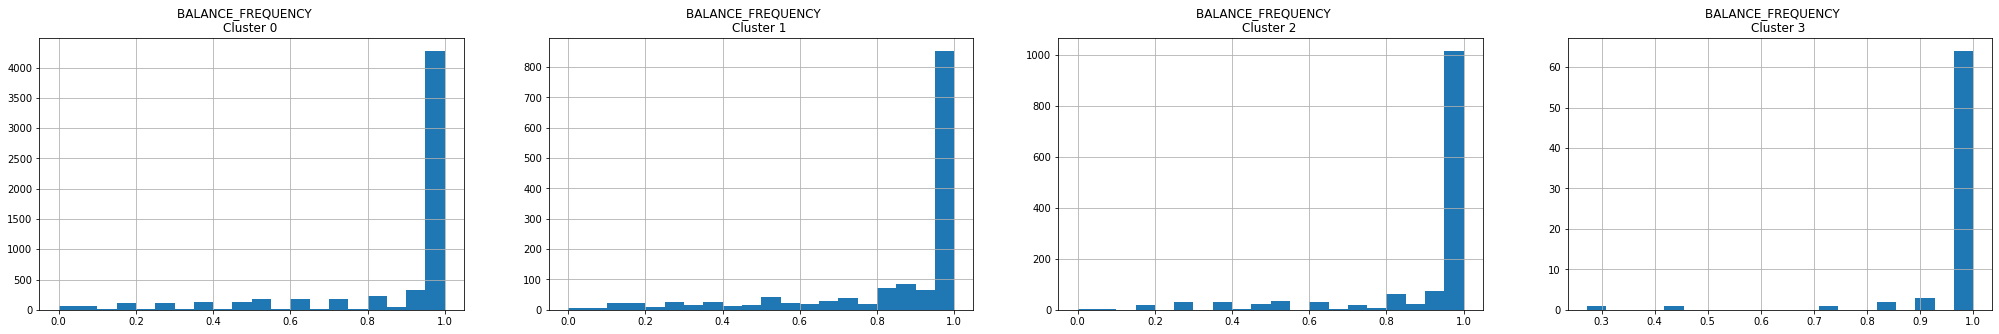

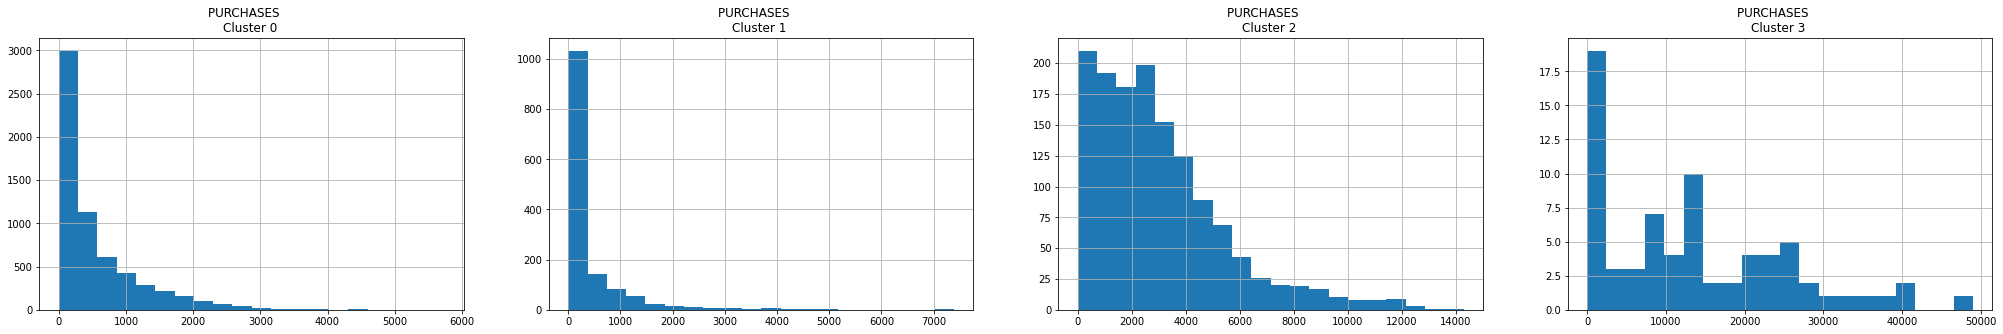

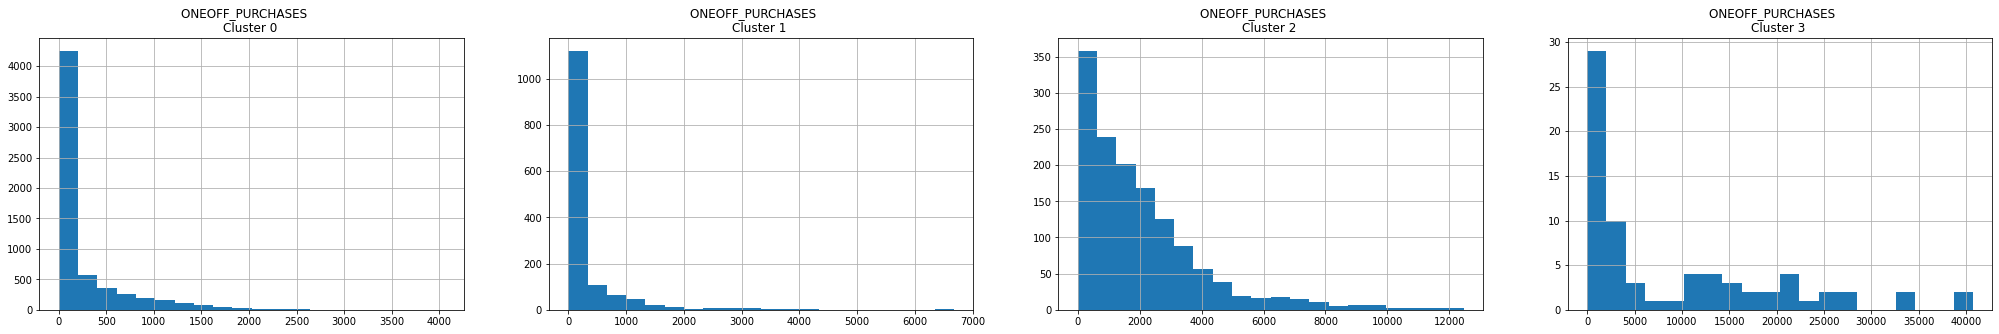

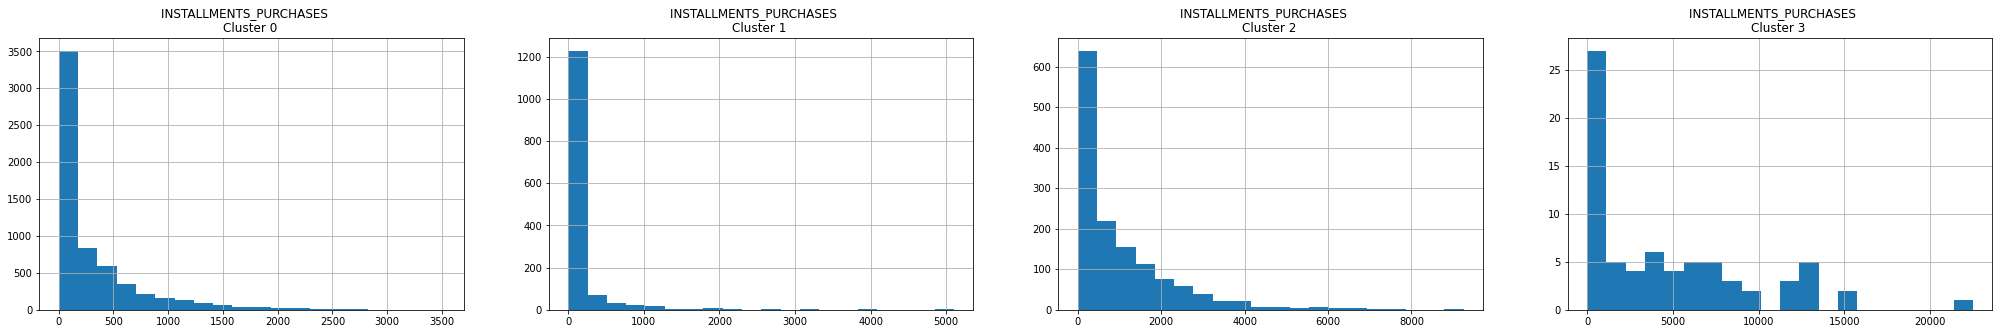

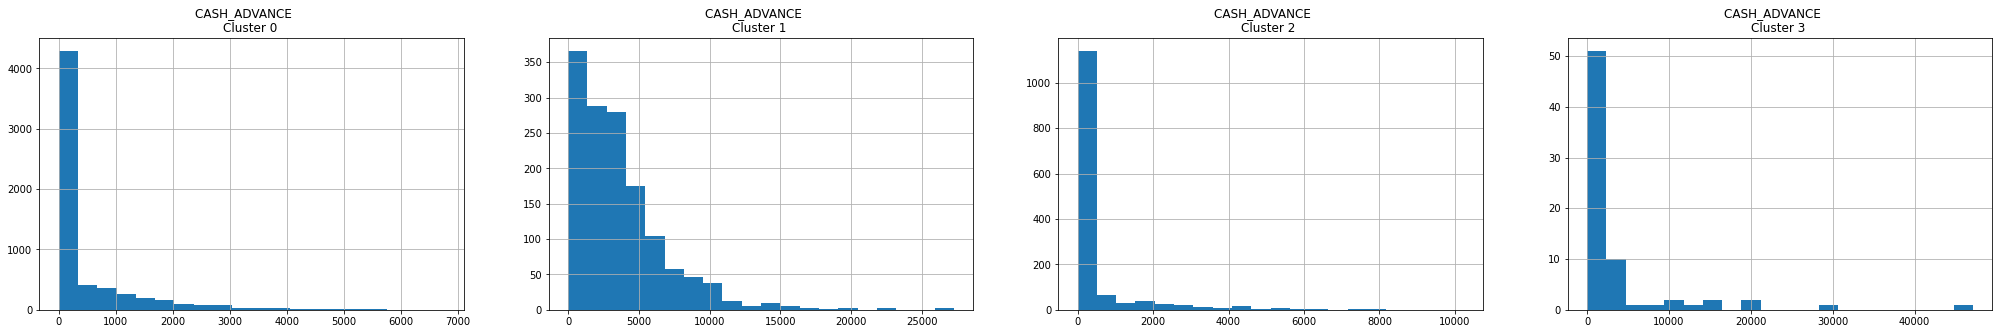

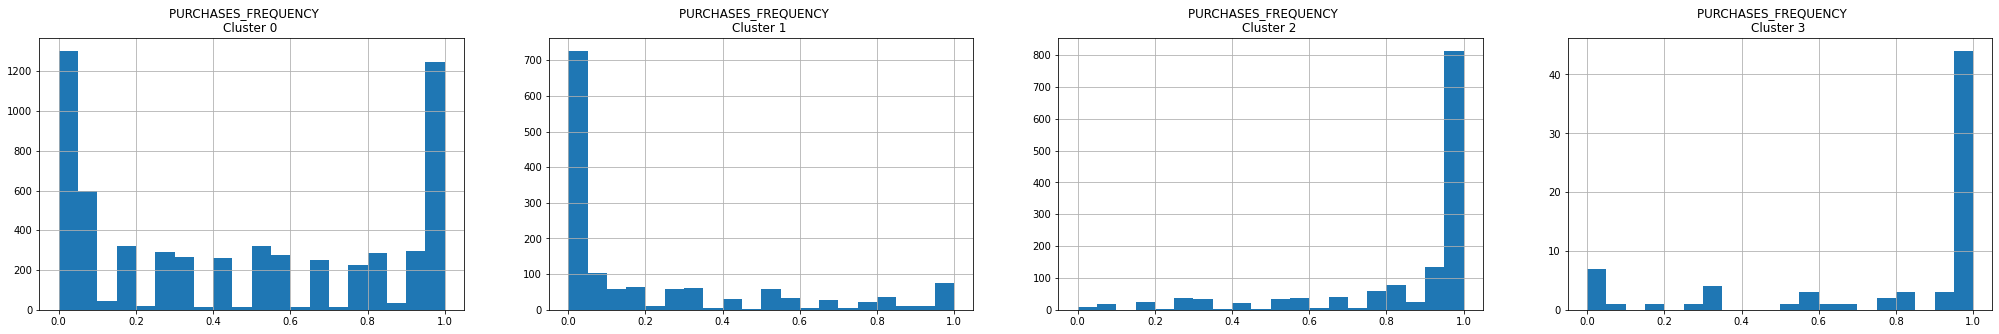

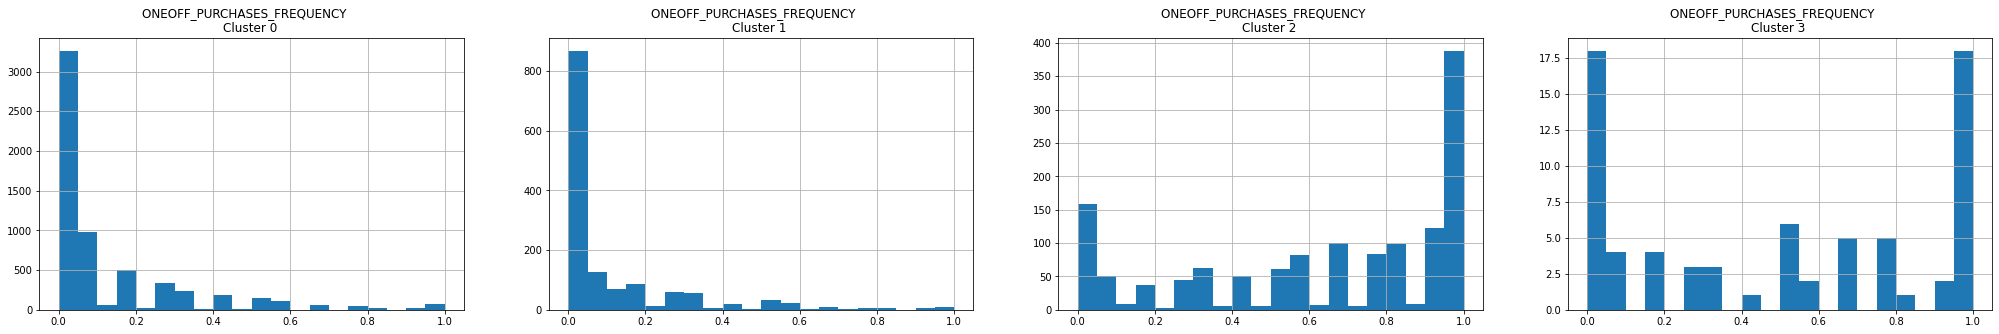

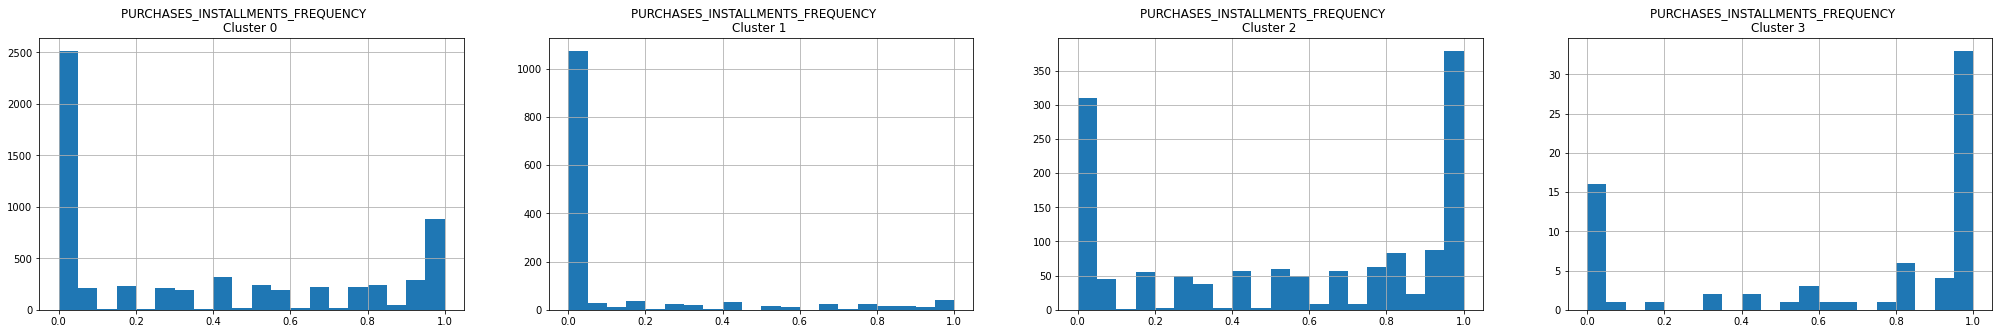

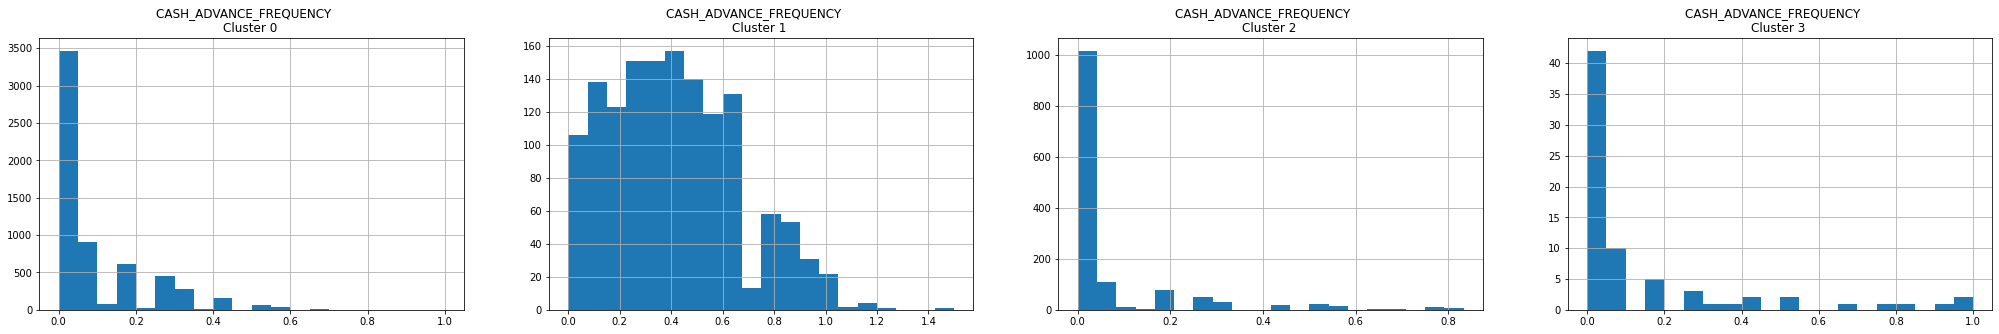

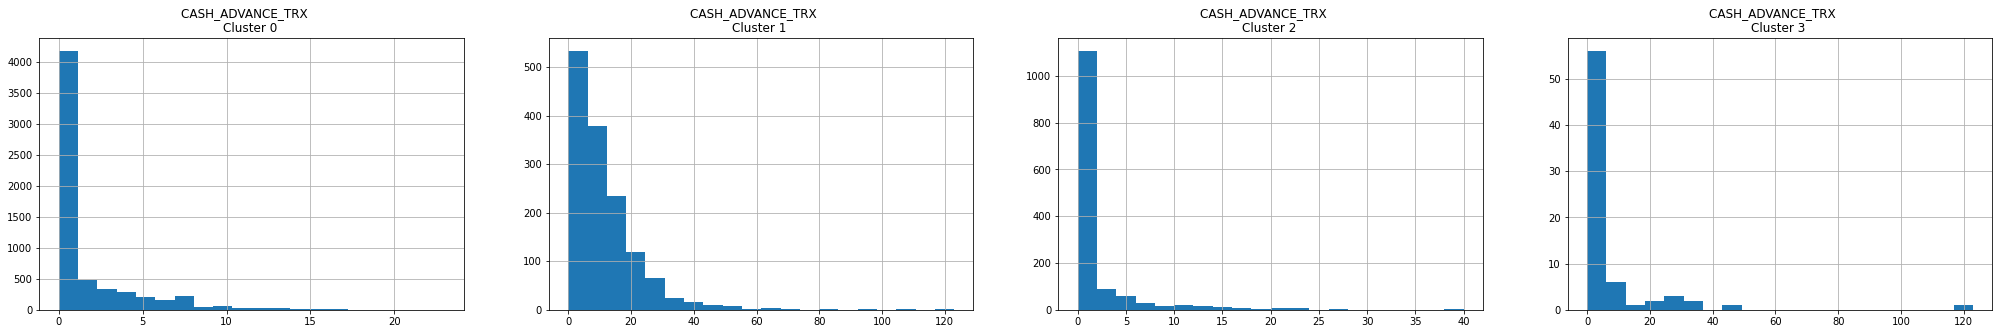

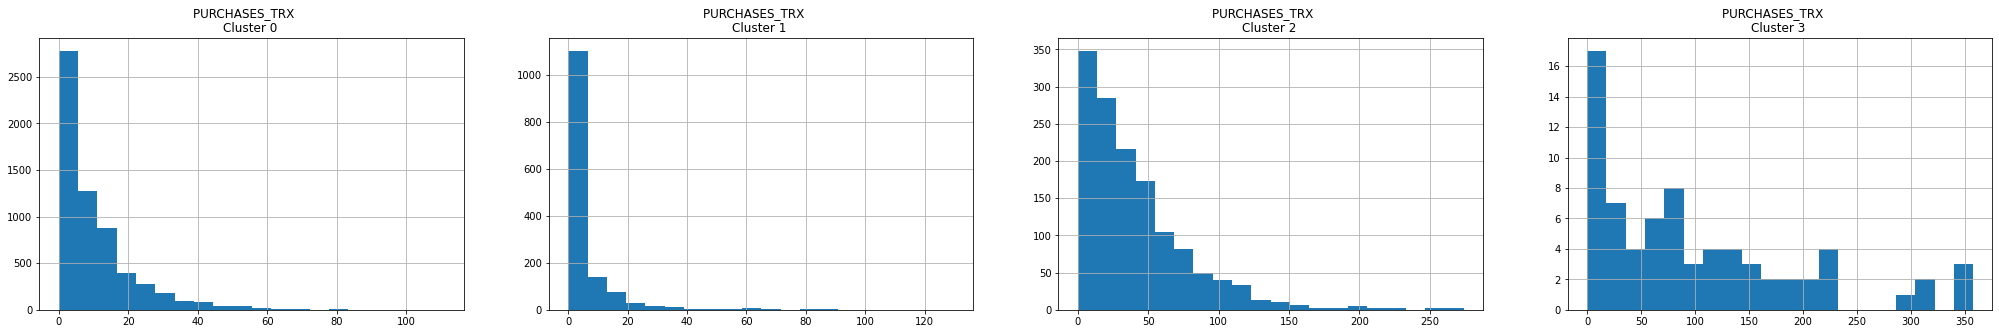

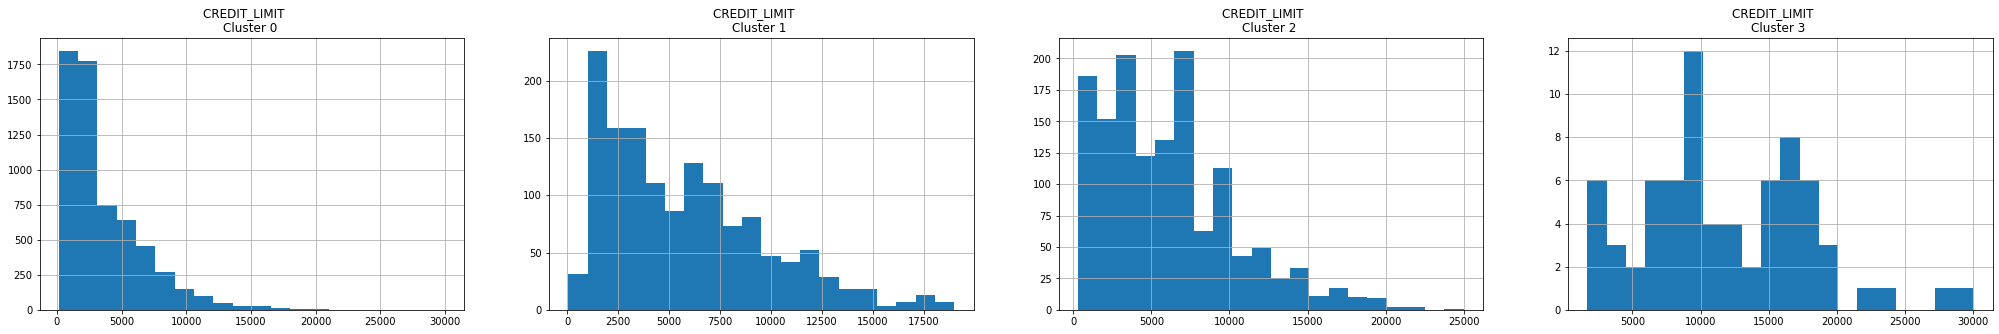

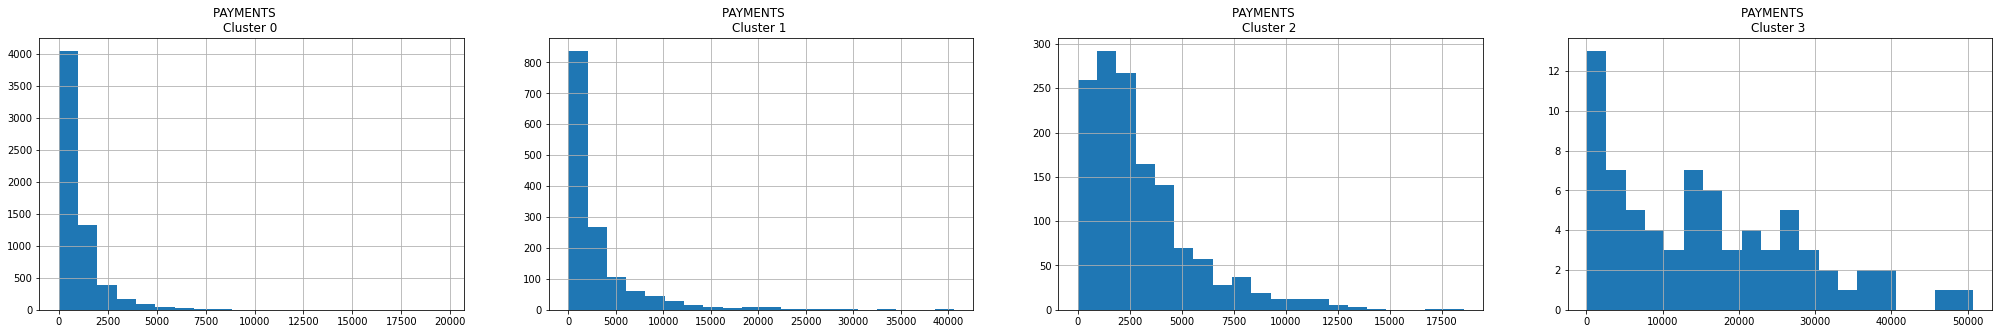

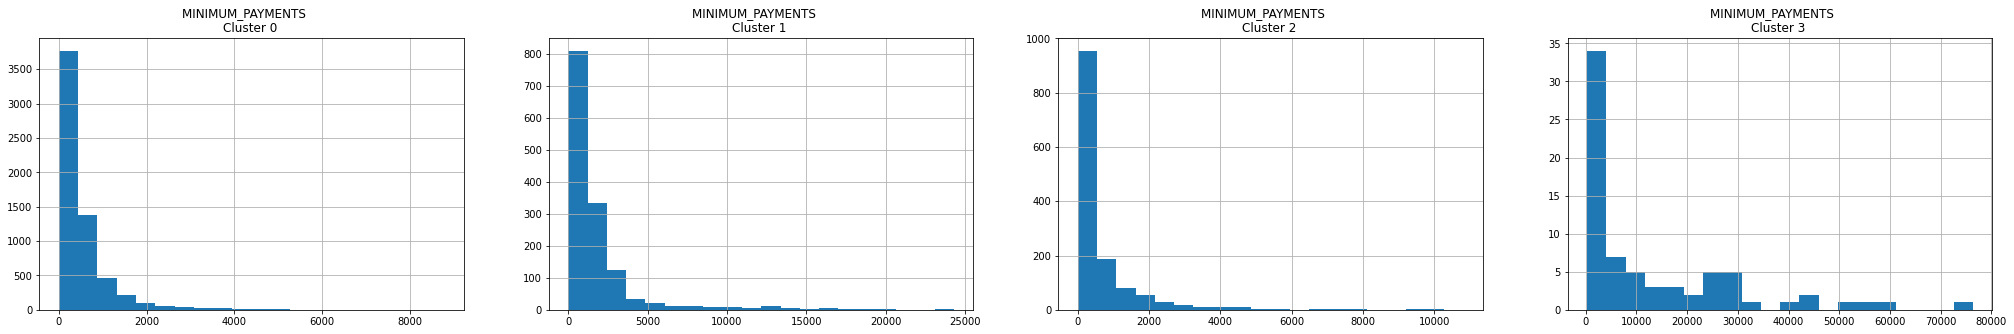

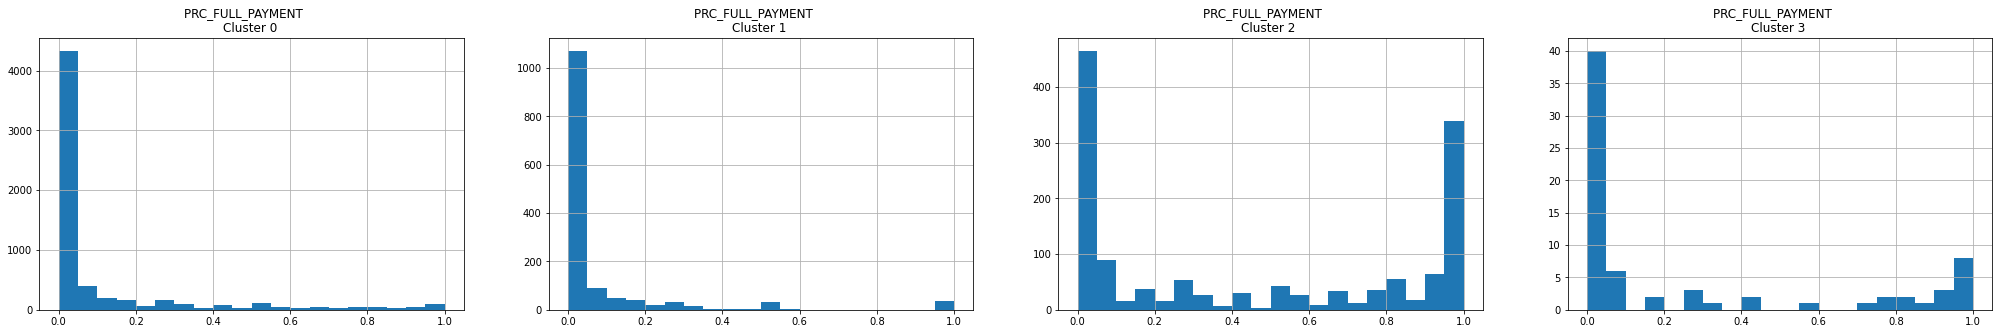

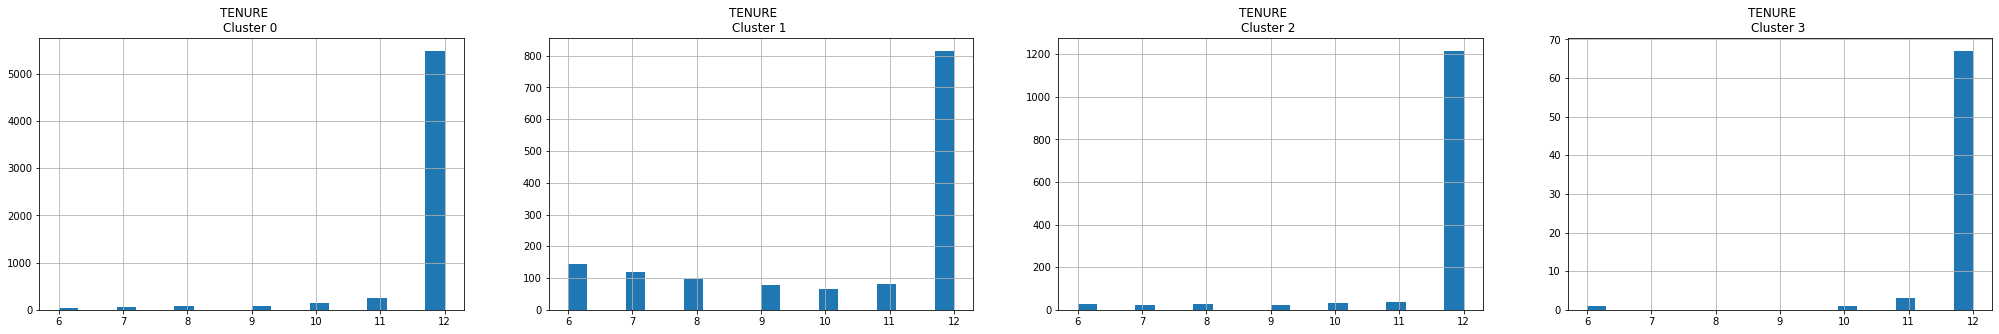

In [ ]:
# Plot the histogram of various clusters average data
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

**Analysis:**

**Cluster 0:** Keeps low balance, and have low cash advance and those who pay less amount of interest charges and are careful with the money.

**Cluster 1:**  Second Highest balance and highest cash advance , low purchase frequency, high cash advance frequency(0.4), high cash advance transactions(11.6) and low percentage of full payments

**Cluster 2:** Second Largest credit limit \$6K and highest percentage of full payment, target for increase credit limit and increase spending habits 

**Cluster 4:**: Highest balance, with high number of purchases , installment purchases , purchase frequencies . They have the highest credit limit. and are long tenure 


## Personas around the clusters

**Cluster 0:**

This persona comprises of individuals who are very careful with money.This might be because they have financial responsibilities - like saving up for their kid's higher education.

**Recommendation:** Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.

**Cluster 1:**

This persona includes individuals who are not much familiar with the usage of credit cards. As it could be visible from their cash advance transactions , they do not prefer to take any loans. 

**Recommendation:** Due to reluctance in effectively using the credit card , they might be supported with more discounts , promos and coupuns.

**Cluster 2:**
This segment is made up of people who can be target for increase credit limit and increase spending habits.
They are very high spenders and might be enthusiatic individuals who enjoys good lifestyle.

**Recommendation:**These indiviauls spent a lot and provide them with discounts that made them spent more will be a good idea. For example hotel discounts or holiday coupons will be best idea . Also, introduce the top brands to them by providing promo codes will get them spent more.

**Cluster 3:** Most reliable customers with high income group. These group of people are high spenders and know how to spend money. This segment comprises of people who use credit card as a loan (most lucrative sector).

**Recommendation:** The large spending capacity of these people allow them to take the next bold initiative such as property to investment or other similar financial commitments.


Thus we have successfully identified the pattern in the model.This could be used to classify any customer and identify ther target promotions. Thus we can encourage the customers spend more money and thus to increase the profit of the company.

!!!!!!!! The End !!!!!!!
